# CREDIT EDA ASSIGNMENT 

# Problem Statement 
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected. 

# 01. Import Libraries

In [268]:
import warnings
warnings.filterwarnings('ignore')


In [269]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [270]:
pd.set_option('Display.max_rows',800)
pd.set_option('Display.max_columns',800)


# 02. Application Data

# Data Loading and Inspection

In [271]:
# Reading the csv file 'application_data.csv' using 'read_csv'
apd_df=pd.read_csv('application_data.csv')

In [272]:
apd_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [273]:
apd_df.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [274]:
# Checking no. of rows and columns of dataframe
apd_df.shape

(307511, 122)

In [275]:
# Check the column-wise info of the dataframe
apd_df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [276]:
# Check the summary for the numeric columns
apd_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       


# Data Cleaning


#  Checking For Missing Values 

In [277]:
# Checking % of missing values

null_value=apd_df.isnull().sum()/len(apd_df)*100


In [278]:
null_value.sort_values(ascending = False).head(50)


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [279]:
# List of Columns & NA counts where NA values are more than 35%
Nul_col = apd_df.isnull().sum().sort_values(ascending = False)
Nul_col = Nul_col[Nul_col.values >(0.35*len(apd_df))]

In [280]:
# Number of columns having percentage of null values > 35%
len(Nul_col)

49

In [281]:
# Function to remove the columns having percentage of null values > 35%
def removeNulls(dataframe,percent=0.35):
    df = dataframe.copy()
    ishape = df.shape
    colunames = (df.isnull().sum()/len(df))
    colunames = list(colunames[colunames.values>=percent].index)
    df.drop(labels = colunames,axis =1,inplace=True)        
    print("Number of Columns dropped\t: ",len(colunames))    
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)
    return df

In [282]:
# Comparing of shape of new and old data sets
apd_df = removeNulls(apd_df,percent = 0.35)

Number of Columns dropped	:  49

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 73)


In [283]:
# Checking the % of null values for each column in new dataset
nullu = apd_df.isnull().sum()/len(apd_df)*100
nullu.sort_values(ascending = False).head(60)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


# Imputing Missing Values In Some Columns

#### We can impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_YEAR' with the hepl of mode, which is the value '0'.

In [284]:
apd_df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()


0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [285]:

apd_df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()


0    0.0
dtype: float64

#### Similar to the column 'AMT_REQ_CREDIT_BUREAU_YEAR', we can impute the missing values of columns month, week, day,hour, and qrt with the mode, which is the value '0'. As they all are number of credit enquiries, replacing missing values with the most frequent value would make more sense.

In [286]:
apd_df.AMT_REQ_CREDIT_BUREAU_MON.mode()


0    0.0
dtype: float64

In [287]:
apd_df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()


0    0.0
dtype: float64

In [288]:
apd_df.AMT_REQ_CREDIT_BUREAU_DAY.mode()


0    0.0
dtype: float64

In [289]:
apd_df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()


0    0.0
dtype: float64

In [290]:
apd_df.AMT_REQ_CREDIT_BUREAU_QRT.mode()


0    0.0
dtype: float64

#### Here we can impute the missing values for the column 'OCCUPATION_TYPE' with mode, which is the value 'Laborers'

In [291]:
apd_df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

####  Checking the column 'AMT_ANNUITY', we can impute the missing values with the median, which is the value '24903.0'

In [292]:
apd_df.AMT_ANNUITY.value_counts()


9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

#### Checking the column 'AMT_GOODS_PRICE', if we can impute the missing values with the median, which is the value '450000'

In [293]:
apd_df.AMT_GOODS_PRICE.value_counts() 


450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

#  Error in Data types and Data

#### Imputing the absolute values in column ehich containing days in negative numbers

In [294]:
# Checking the values present in columns starting with 'DAYS'
print(apd_df['DAYS_BIRTH'].unique())
print(apd_df['DAYS_EMPLOYED'].unique())
print(apd_df['DAYS_REGISTRATION'].unique())
print(apd_df['DAYS_ID_PUBLISH'].unique())
print(apd_df['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [295]:
# The columns starting with 'DAYS'
filter_colu = [col for col in apd_df if col.startswith('DAYS')]
filter_colu

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [296]:
# Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive
apd_df[filter_colu]= abs(apd_df[filter_colu])

In [297]:
print(apd_df['DAYS_BIRTH'].unique())
print(apd_df['DAYS_EMPLOYED'].unique())
print(apd_df['DAYS_REGISTRATION'].unique())
print(apd_df['DAYS_ID_PUBLISH'].unique())
print(apd_df['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [298]:
apd_df.describe()


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean         4986.120328      2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min             0.000000         0.000000       0.000000        0.000000   
25%          2010.000000      1720.000000       1.000000        1.000000   
50%          4504.000000      3254.000000       1.000000        1.000000   
75%          7479.500000      4299.000000       1.000000        1.000000   
max         24672.000000      7197.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [299]:
apd_df.CODE_GENDER.value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Imputing the value'XNA' which means not available for the column 'CODE_GENDER'

In [300]:
# Replacing XNA value with F
apd_df.loc[apd_df.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
apd_df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [301]:
apd_df.ORGANIZATION_TYPE.value_counts()


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

####  Imputing the value'XNA' which means not available for the column 'ORGANIZATION_

In [302]:
# Replacing XNA with NaN
apd_df = apd_df.replace('XNA',np.NaN)

In [303]:
apd_df.ORGANIZATION_TYPE.value_counts()


Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

#### Binning of continuous variables

In [304]:
 #Binning 'AMT_INCOME_RANGE' based on quantiles
apd_df['AMT_INCOME_RANGE'] = pd.qcut(apd_df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
apd_df['AMT_INCOME_RANGE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [305]:

# Binning 'AMT_CREDIT_RANGE' by creating various ranges
apd_df['AMT_CREDIT_RANGE'] = pd.qcut(apd_df.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
apd_df['AMT_CREDIT_RANGE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [306]:
apd_df['AMT_CREDIT_RANGE'].head(10)


0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
7    VERY_HIGH
8         HIGH
9          LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [307]:
# Converting 'DAYS_BIRTH' to years
apd_df['DAYS_BIRTH']= (apd_df['DAYS_BIRTH']/365).astype(int)

In [308]:
apd_df['DAYS_BIRTH'].unique()


array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [309]:

# Biining 'DAYS_BIRTH'
apd_df['DAYS_BIRTH_BINS']=pd.cut(apd_df['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [310]:
apd_df['DAYS_BIRTH_BINS'].value_counts()


Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: DAYS_BIRTH_BINS, dtype: int64

# 03. Analysis

## Finding Outliers

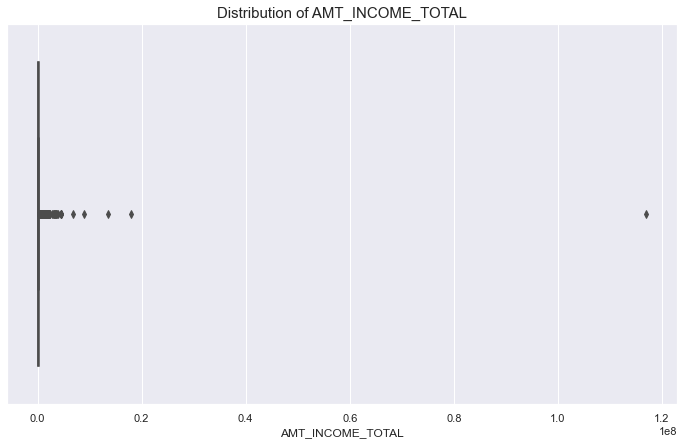

In [311]:
# boxplot for 'AMT_INCOME_TOTAL' column to check the outliers
plt.figure(figsize=[12,7])
sns.boxplot(apd_df.AMT_INCOME_TOTAL)
plt.title('Distribution of AMT_INCOME_TOTAL',size=15)
plt.show()

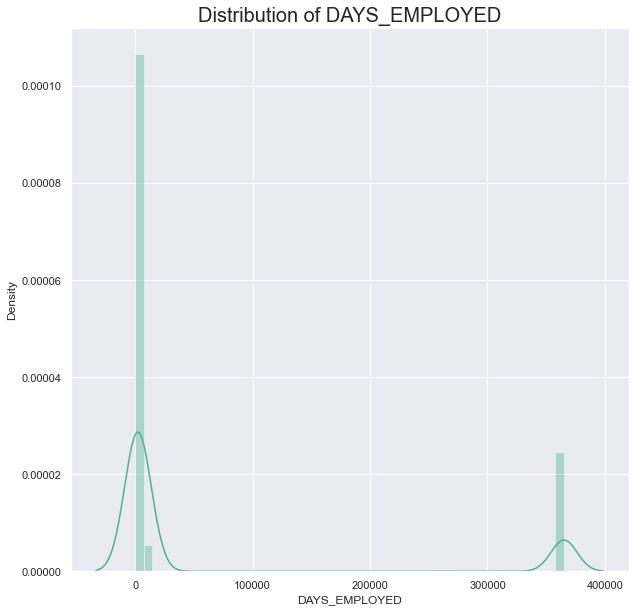

In [312]:
# distribution of 'DAYS_EMPLOYED'
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(apd_df['DAYS_EMPLOYED'], color="#4CB391" )
plt.title('Distribution of DAYS_EMPLOYED', fontdict={'fontsize':20} )
plt.show()

#### Here, in the coloumn 'DAYS_EMPLOYED' which tells how many days before the application the person started current employment. We observe a value which is greater that 20,000 which is surely an outlier because 25,000/365 will be around 54 years. Considering that a person started working at age of 21, the person will be 21+54 will turn out to be 75 years old.




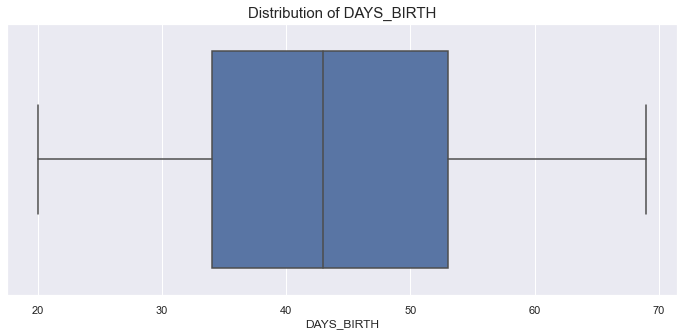

In [313]:
# boxplot for Distribution of DAYS_BIRTH
plt.figure(figsize=[12,5])
sns.boxplot(apd_df.DAYS_BIRTH)
plt.title('Distribution of DAYS_BIRTH',size=15)
plt.show()


#### We do not find any outliers in the coloumn 'DAYS_BIRTH'.




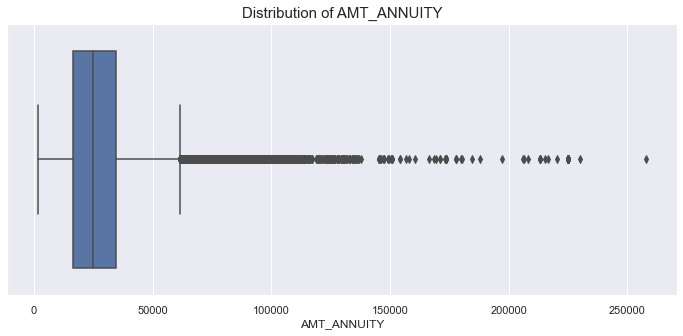

In [314]:
plt.figure(figsize=[12,5])
sns.boxplot(apd_df.AMT_ANNUITY)
plt.title('Distribution of AMT_ANNUITY',size=15)
plt.show()


####  Here, in the coloumn 'AMT_AANNUITY' which tells the loan annuity. We observe a value which is greater that 258000 which is surely an outlier.

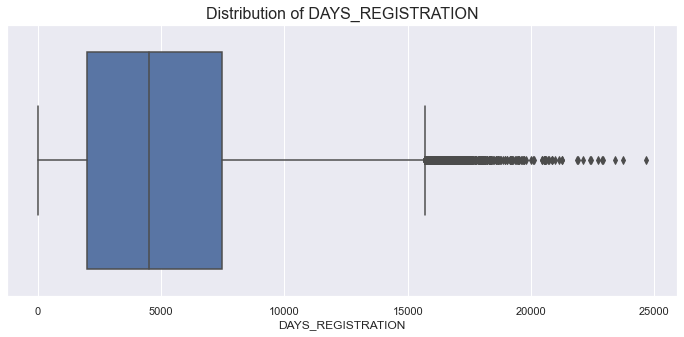

In [315]:
plt.figure(figsize=[12,5])
sns.boxplot(apd_df.DAYS_REGISTRATION)
plt.title('Distribution of DAYS_REGISTRATION',size=16)
plt.show()

#### Here, in the coloumn 'DAYS_REGISTRATION' which how many days before the application did client change his registration. We observe a value which is greater that 24000 which is surely an outlier.

## Checking Imbalance

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


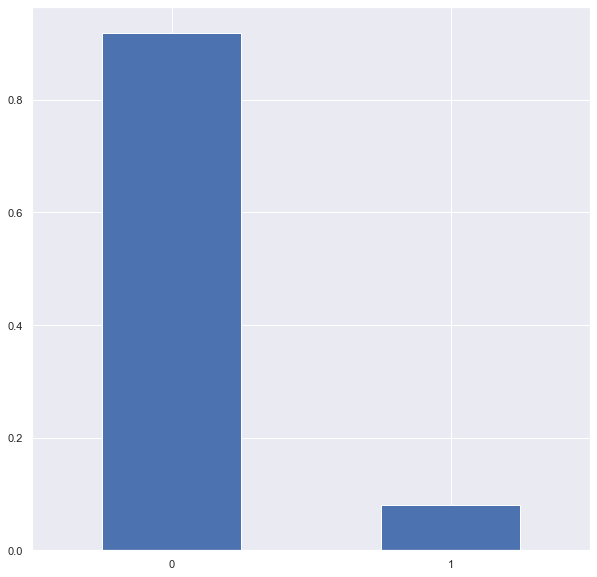

In [316]:
#Checking the imbalance percentage.
print(100*apd_df.TARGET.value_counts()/ len(apd_df))
(apd_df.TARGET.value_counts()/ len(apd_df)).plot.bar()
plt.xticks(rotation=0)
plt.show()

### So this is not a balanced data set

# 04.Dividing the dataset into two different datasets based upon 'Target' value.

In [317]:
# Dividing the original dataset into two different datasets depending upon the target value
trt0 = apd_df.loc[apd_df.TARGET == 0]
trt1 = apd_df.loc[apd_df.TARGET == 1]

## Univariate Analysis of Categorical Variables


### Gender Distribution

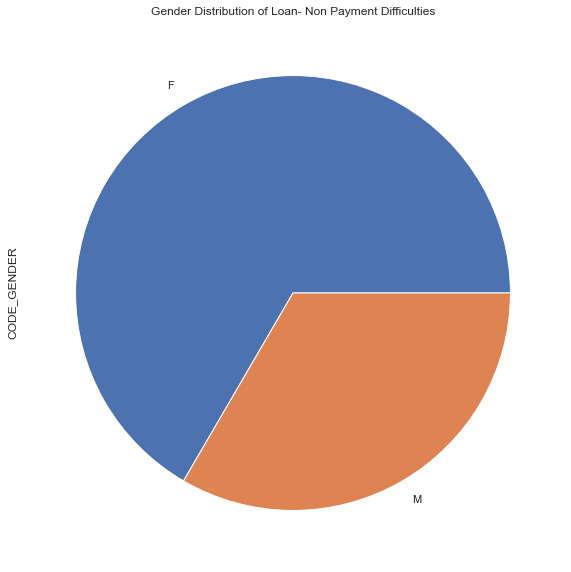

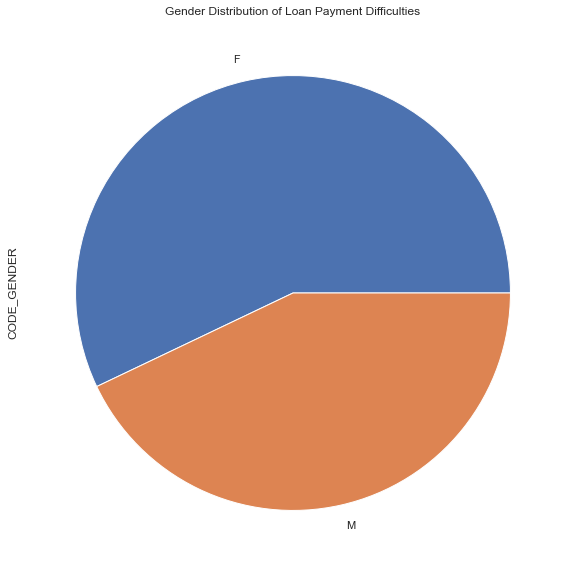

In [318]:
#Performing analysis for one column at a time
# perform univariate analysis for categoriacal variables for both 0 and 1
# CODE_GENDER (categorical ordered variable)
# for TARGET=0

trt0.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.title('Gender Distribution of Loan- Non Payment Difficulties')
plt.show()

# for TARGET=1
trt1.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.title('Gender Distribution of Loan Payment Difficulties')
plt.show()

#### Comaparing the Payment Difficulties and Non Payment Difficulties on the basis of Gender, we observe that Females are the majority in both the cases although there is an increase in the percentage in Male Payment Difficulties from Non-Payment Difficulties

## Income Source

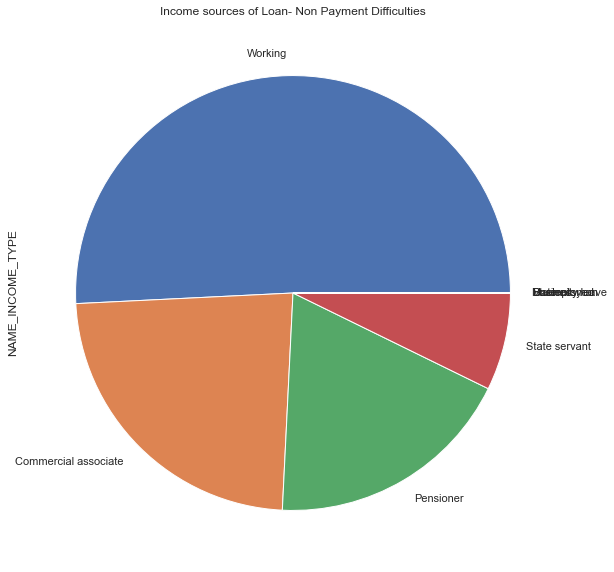

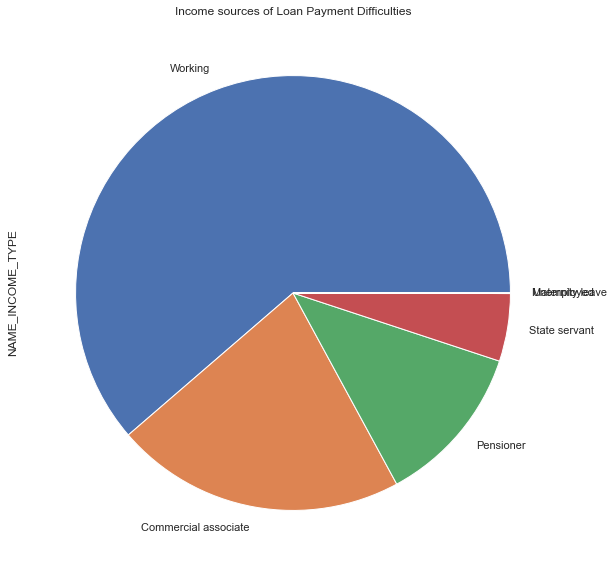

In [319]:
# Income sources of Loan- Non Payment Difficulties
# for TARGET=0
trt0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.pie()
plt.title('Income sources of Loan- Non Payment Difficulties')
plt.show()
# for TARGET=1
trt1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.pie()
plt.title('Income sources of Loan Payment Difficulties')
plt.show()

#### We observe a decrease in the percentage of Payment Difficulties who are pentioners and an increase in the percentage of Payment Difficulties who are working when compared the percentages of both Payment Difficulties and non-Payment Difficulties.



## Family Status


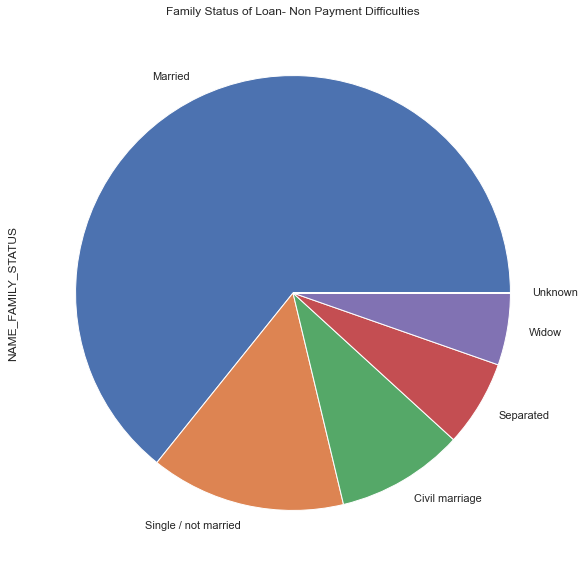

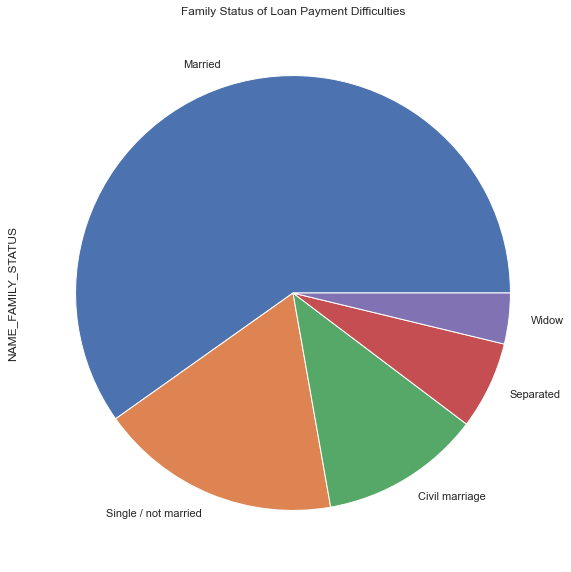

In [320]:
# Family Status of Loan- Non Payment Difficulties
# for TARGET=0
trt0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.pie()
plt.title('Family Status of Loan- Non Payment Difficulties')
plt.show()
# for TARGET=1
trt1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.pie()
plt.title('Family Status of Loan Payment Difficulties')
plt.show()

### We observe a decrease in the percentage of married and widowed with Loan Payment Difficulties and an increase in the the percentage of single and civil married with Loan Payment Difficulties when comapred with the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties

# Education

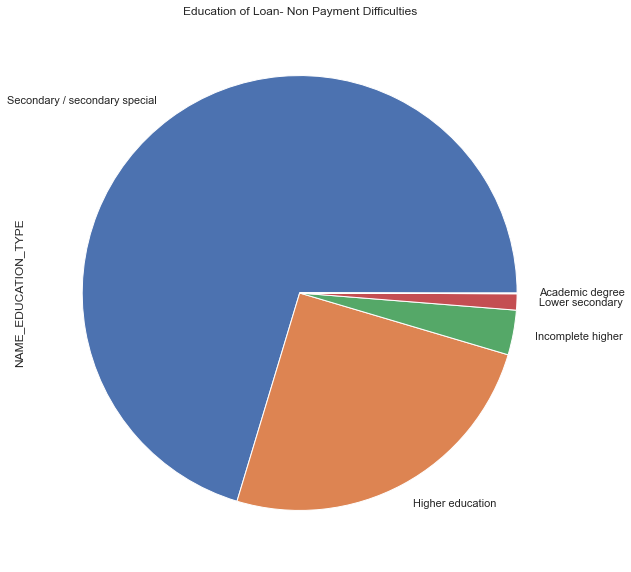

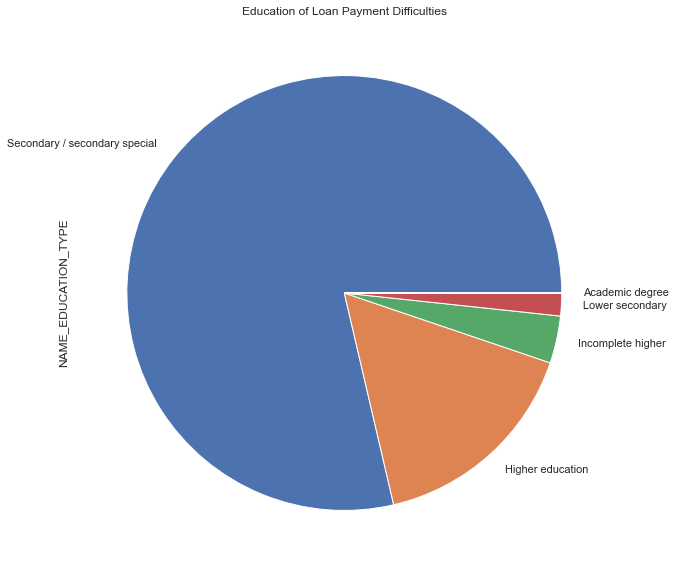

In [321]:
# Education of Loan- Non Payment Difficulties
# for TARGET=0
trt0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.title('Education of Loan- Non Payment Difficulties')
plt.show()
# for TARGET=1
trt1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.title('Education of Loan Payment Difficulties')
plt.show()

#### We observe an increase in percentage of Loan Payment Difficulties whose educational qualifications are secondary/secondary special and a decrease in the percentage of Loan Payment Difficulties who have completed higher education when compared with the percentages of Loan Payment Difficulties and Loan Non-Payment Difficulties

# Housing

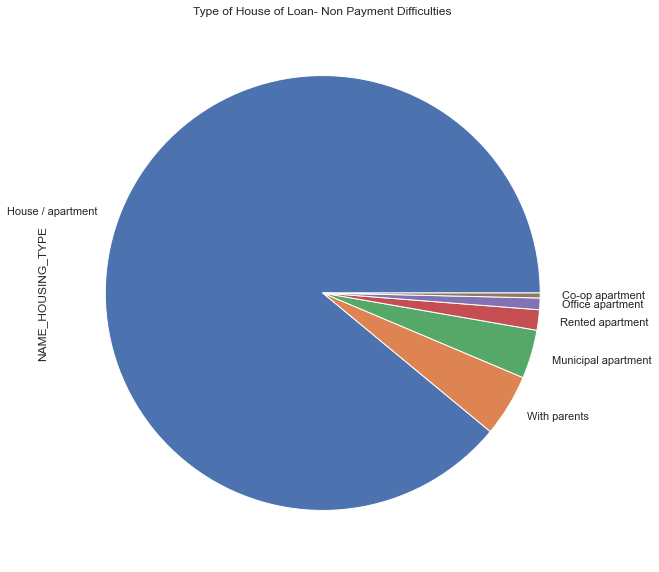

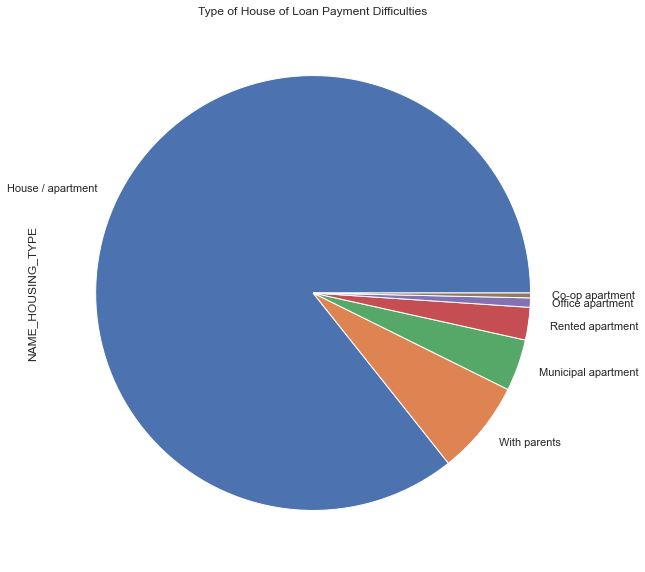

In [322]:
# Type of House of Loan- Non Payment Difficulties
# for TARGET=0
trt0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.pie()
plt.title('Type of House of Loan- Non Payment Difficulties')
plt.show()
# for TARGET=1
trt1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.pie()
plt.title('Type of House of Loan Payment Difficulties')
plt.show()

### We observe an increase in the percentage of Payment Difficulties who live with their parents when compared to the percentages of Payment Difficulties and non-Payment Difficulties

# Income Range

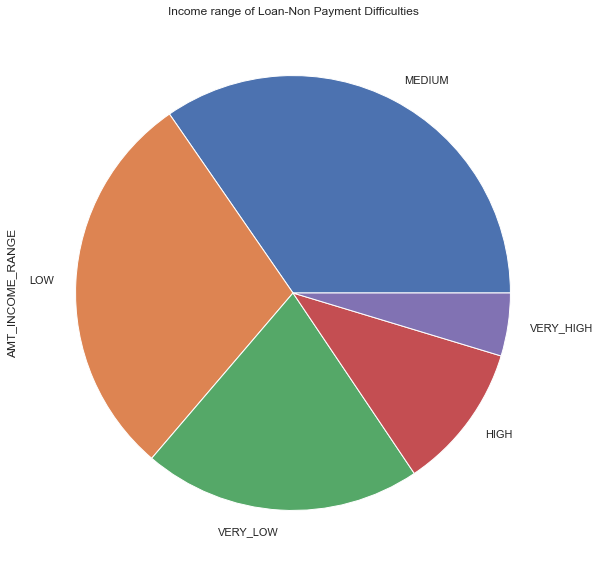

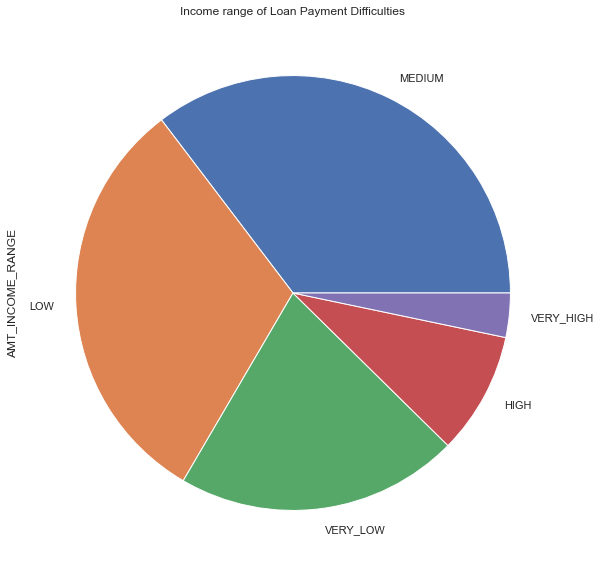

In [323]:
# Income range of Loan-Non Payment Difficulties
# for TARGET=0
trt0.AMT_INCOME_RANGE.value_counts(normalize=True).plot.pie()
plt.title('Income range of Loan-Non Payment Difficulties')
plt.show()
# for TARGET=1
trt1.AMT_INCOME_RANGE.value_counts(normalize=True).plot.pie()
plt.title('Income range of Loan Payment Difficulties')
plt.show()

### We observe an increase in the percentage of Loan Payment Difficulties whose income is low when compared with the percentages of Payment Difficulties and Loan-Non Payment Difficulties 

# AGE

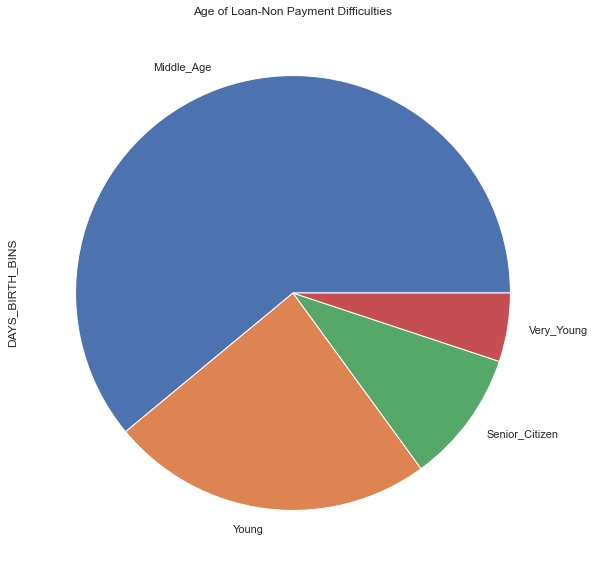

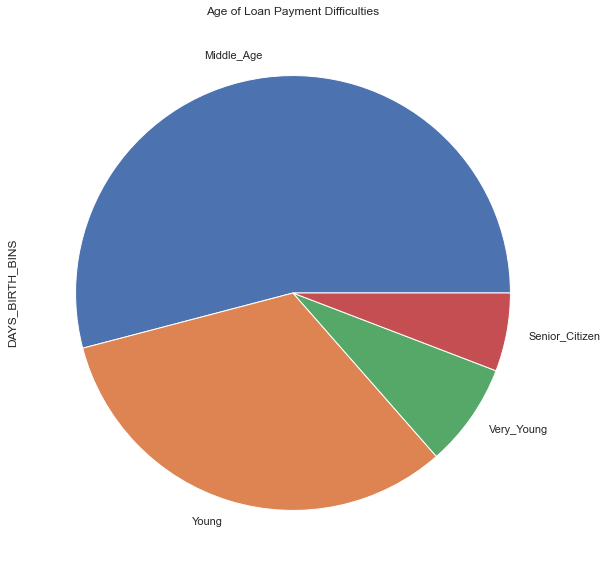

In [324]:
# Age of Loan-Non Payment Difficulties
# for TARGET=0
trt0.DAYS_BIRTH_BINS.value_counts(normalize=True).plot.pie()
plt.title('Age of Loan-Non Payment Difficulties')
plt.show()
# for TARGET=1
trt1.DAYS_BIRTH_BINS.value_counts(normalize=True).plot.pie()
plt.title('Age of Loan Payment Difficulties')
plt.show()

# TYPE OF LOAN

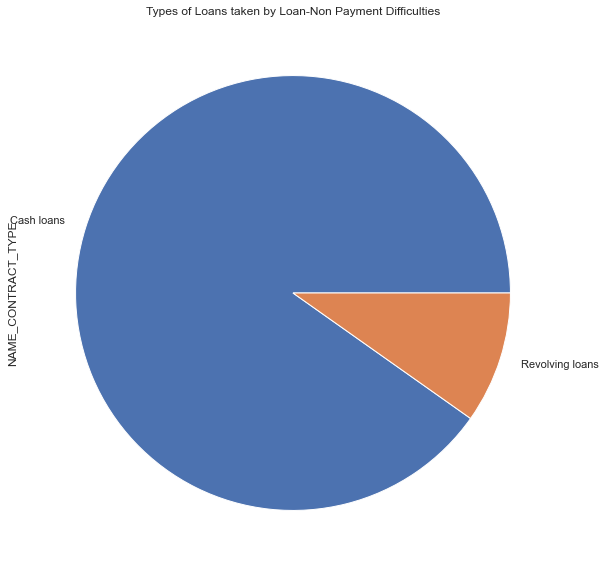

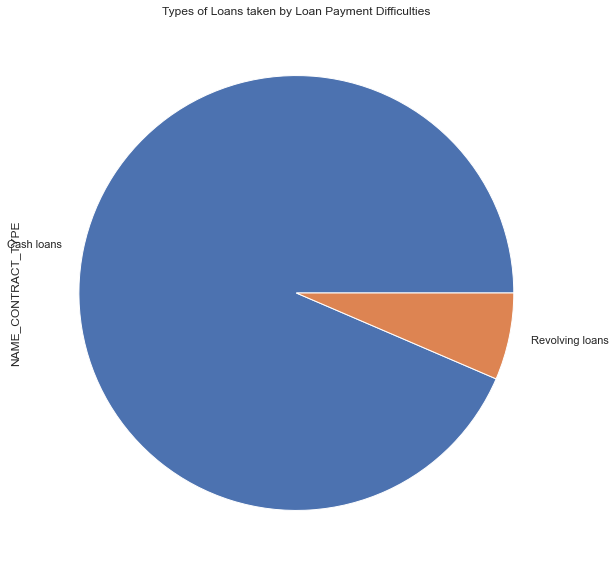

In [325]:
# Types of Loans taken by Loan-Non Payment Difficulties 
# for TARGET=0
trt0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie()
plt.title('Types of Loans taken by Loan-Non Payment Difficulties')
plt.show()
# for TARGET=1
trt1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie()
plt.title('Types of Loans taken by Loan Payment Difficulties')
plt.show()

### We can observe that cash loans are preffered by both Loan Payment Difficulties and Loan-Non Payment Difficulties although there is a decrease in the percentage of Payment Difficulties who opt for revolving loans

## Organization Type

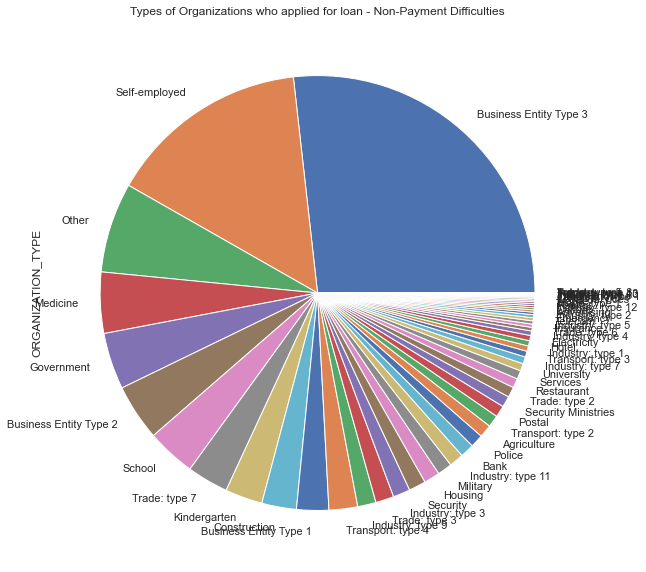

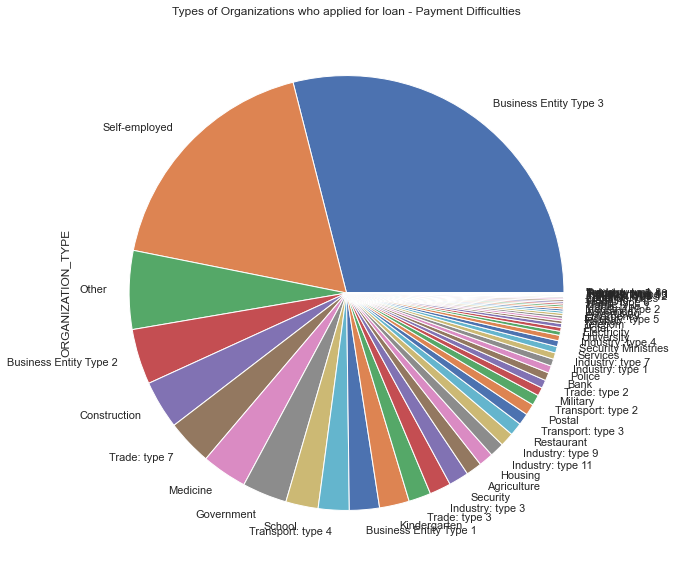

In [326]:
# Types of Organizations who applied for loan - Non-Payment Difficulties
# for TARGET=0
trt0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.pie()
plt.title('Types of Organizations who applied for loan - Non-Payment Difficulties')
plt.show()
# for TARGET=1
trt1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.pie()
plt.title('Types of Organizations who applied for loan - Payment Difficulties')
plt.show()

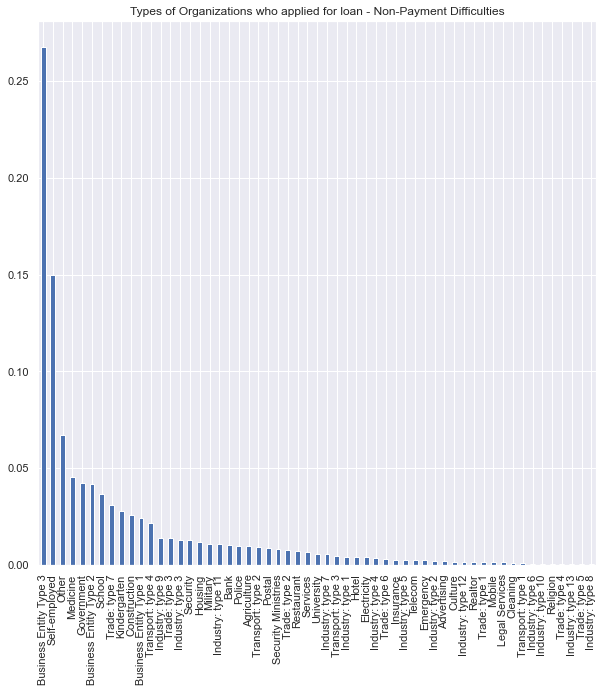

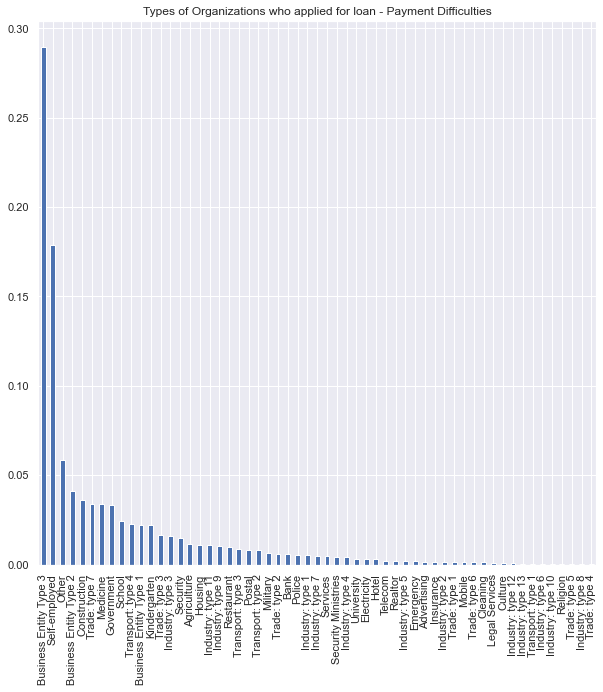

In [327]:
# for TARGET=0
trt0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Types of Organizations who applied for loan - Non-Payment Difficulties')
plt.show()
# for TARGET=1
trt1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Types of Organizations who applied for loan - Payment Difficulties')
plt.show()


### We can observe no major changes here.

# Univariate Analysis of Numerical Variables on the basis of 'Target' Variable

In [328]:
# Function for univariate plots
def uni(df,col,hue =None):
    sns.set(style="darkgrid")
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
    ax[0].set_title("Distribution Plot")
    sns.distplot(df[~df[col].isna()][col],ax=ax[0], color="#4CB391")
    plt.yscale('log')
    ax[1].set_title("Box Plot")
    sns.boxplot(data =df, x=col,ax=ax[1],orient='v', color="#4CB391")
    plt.yscale('log')
    plt.show()

## Loan Annuity

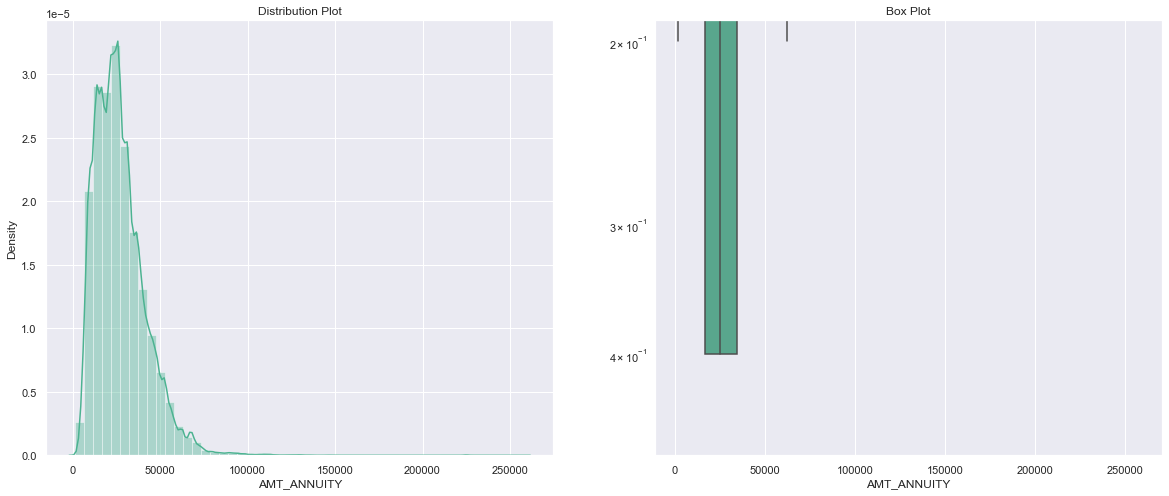

In [329]:
# Distribution and Box plot for 'AMT_ANNUITY' for Loan Non-Payment Difficulties
uni(df=trt0,col='AMT_ANNUITY')

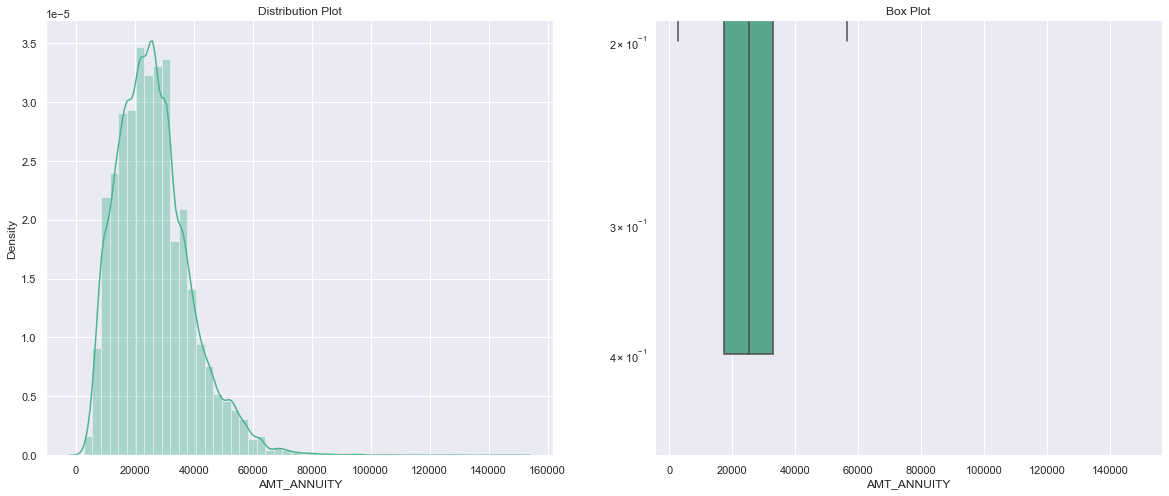

In [330]:
# Distribution and Box plot for 'AMT_ANNUITY' for Loan- Payment Difficulties
uni(df=trt1,col='AMT_ANNUITY')

### Here we can observe some outliers and the first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile

# Credit Amount

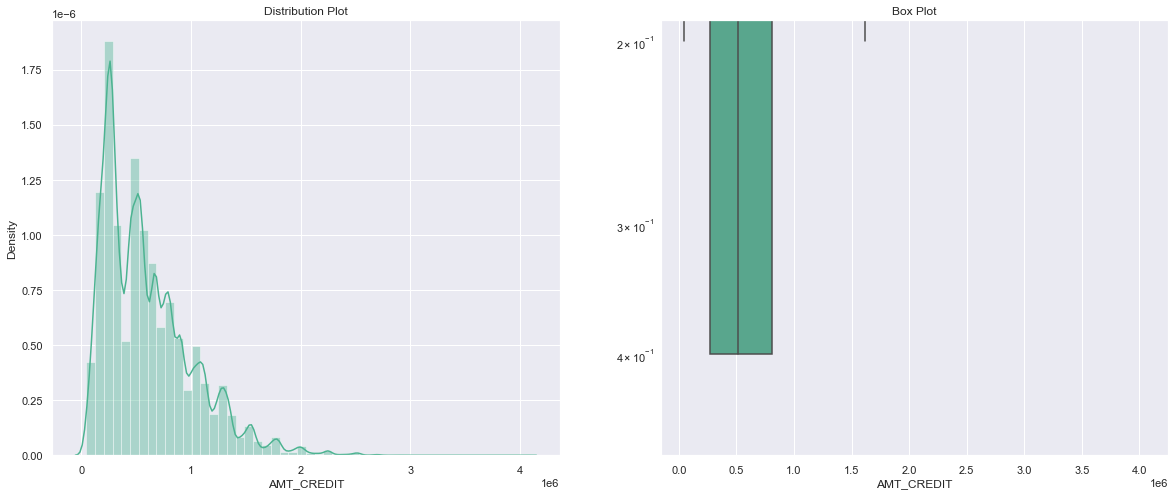

In [331]:
# Distribution and Box plot for 'AMT_CREDIT' for Loan Non-Payment Difficulties
uni(df=trt0,col='AMT_CREDIT')

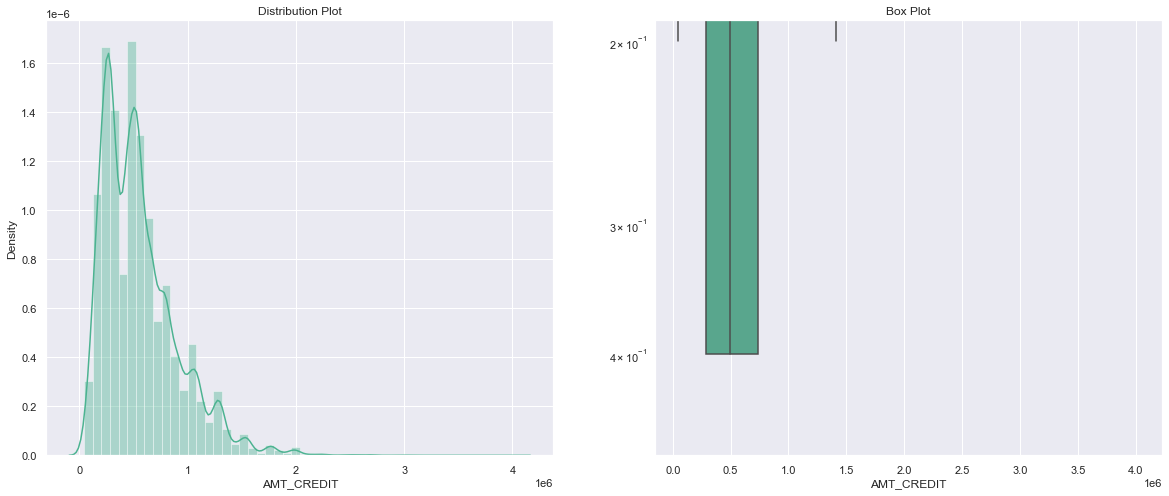

In [332]:
# Distribution and Box plot for 'AMT_CREDIT' for Loan Payment Difficulties
uni(df=trt1,col='AMT_CREDIT')

### We can observe some outliers and the first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile. The distribution curve does not appear to be normal or bell curve.

# Goods Price

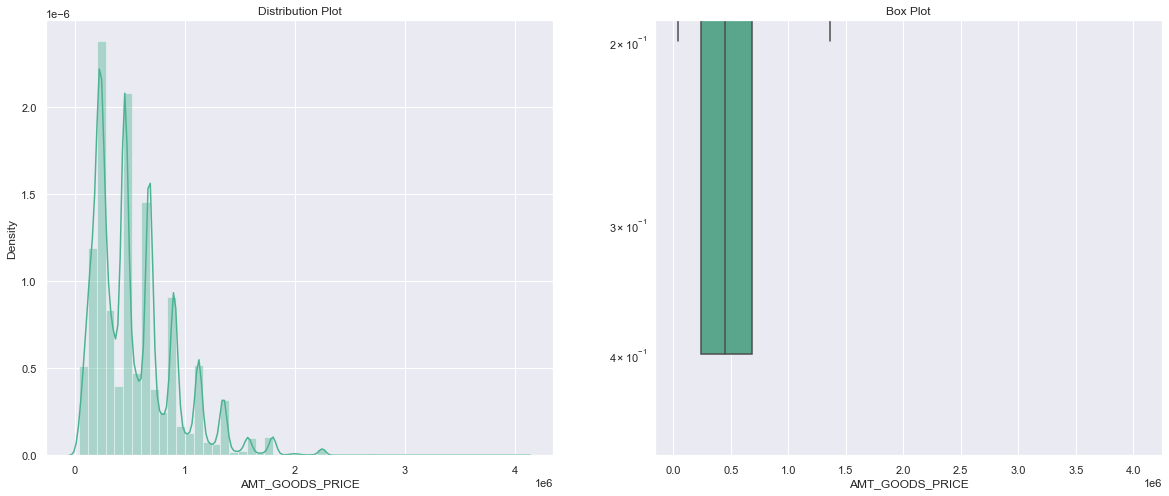

In [333]:
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Loan- Non-Payment Difficulties
uni(df=trt0,col='AMT_GOODS_PRICE')


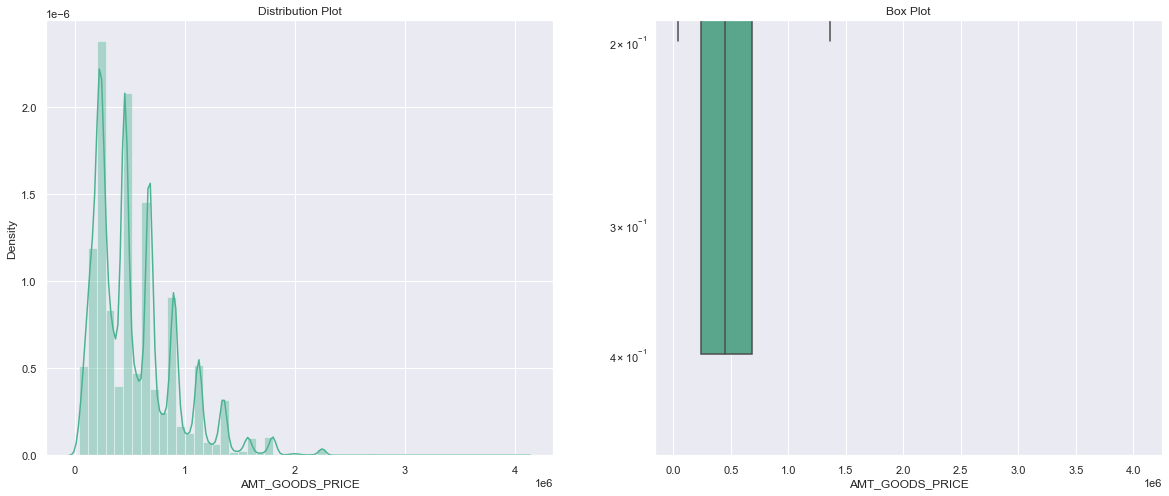

In [334]:
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Loan-Payment Difficulties
uni(df=trt0,col='AMT_GOODS_PRICE')

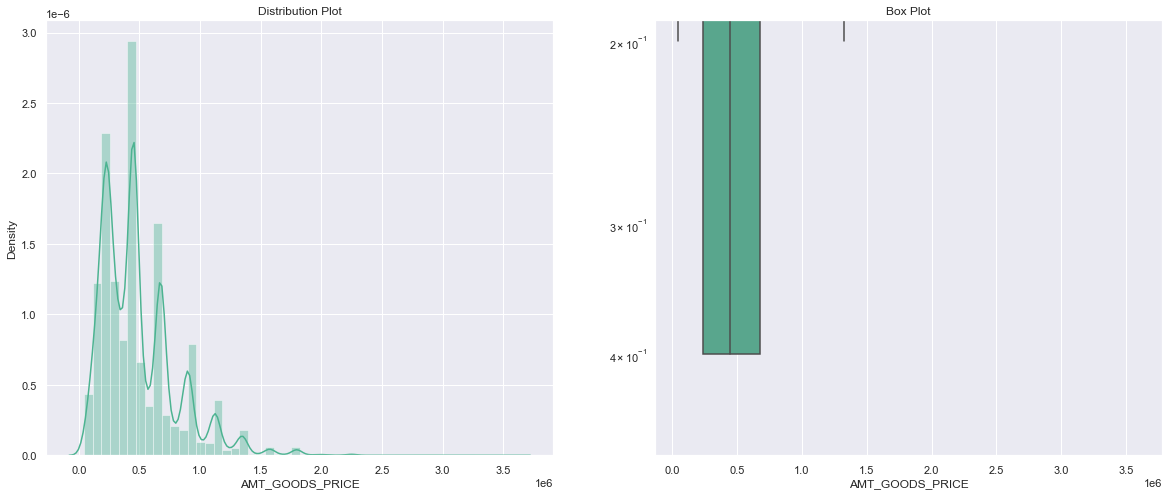

In [335]:
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Loan-Payment Difficulties
uni(df=trt1,col='AMT_GOODS_PRICE')

# Bivariate Analysis

### Bivariate Analysis of Categorical vs Numerical Variables

### Analysis - 1

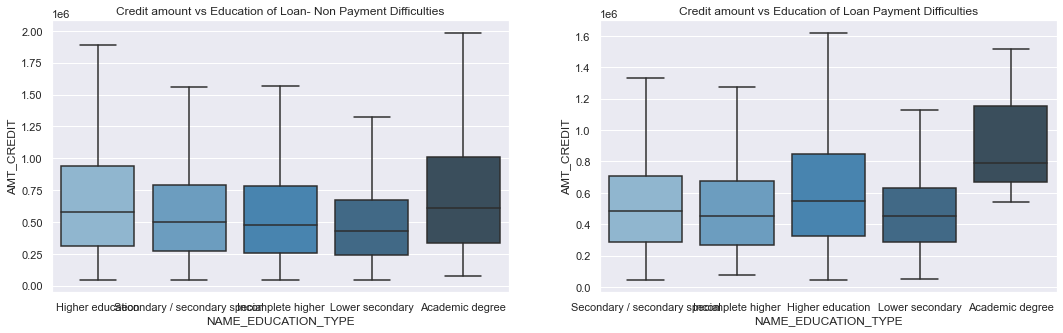

In [336]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Credit amount vs Education of Loan- Non Payment Difficulties")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =trt0, showfliers=False, palette="Blues_d")

plt.subplot(1,2,2)
plt.title("Credit amount vs Education of Loan Payment Difficulties")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = trt1, showfliers=False, palette="Blues_d")
plt.show()

### The graphs for Loan Payment Difficulties and Loan Non-Payment Difficulties apperas to be similar. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.


# Analysis - 2

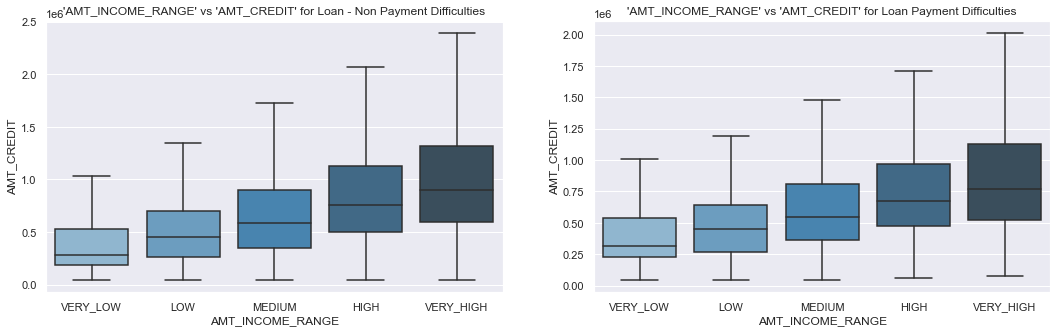

In [337]:
# 'AMT_INCOME_RANGE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("'AMT_INCOME_RANGE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties")
sns.boxplot(x = 'AMT_INCOME_RANGE', y = 'AMT_CREDIT', data =trt0, showfliers=False, palette="Blues_d")

plt.subplot(1,2,2)
plt.title("'AMT_INCOME_RANGE' vs 'AMT_CREDIT' for Loan Payment Difficulties")
sns.boxplot(x = 'AMT_INCOME_RANGE', y = 'AMT_CREDIT', data = trt1, showfliers=False, palette="Blues_d")
plt.show()

### The graphs for Loan Payment Difficulties and Loan- Non Payment Difficulties apperas to be similar.

# Bivariate Analysis of Numerical vs Numerical Variables

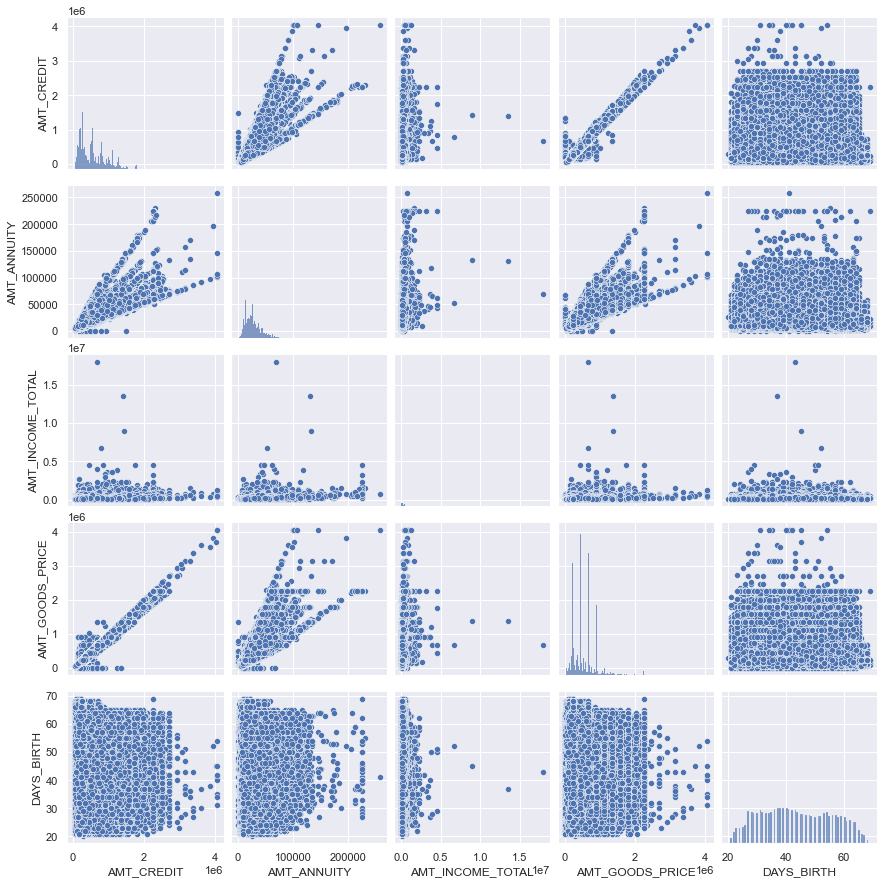

In [338]:
#Pairplot for Target 0 (Loan-Non Payment Difficulties)
pair = trt0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

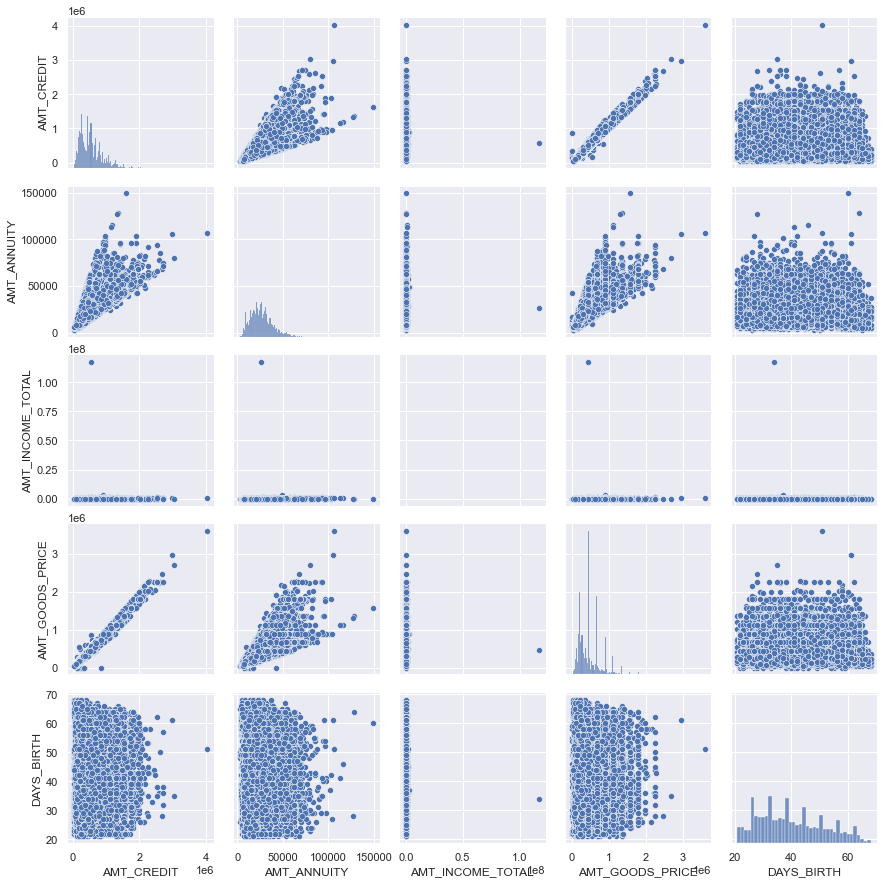

In [339]:
#Pairplot for Target 1 (Loan-Payment Difficulties)
pair = trt1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

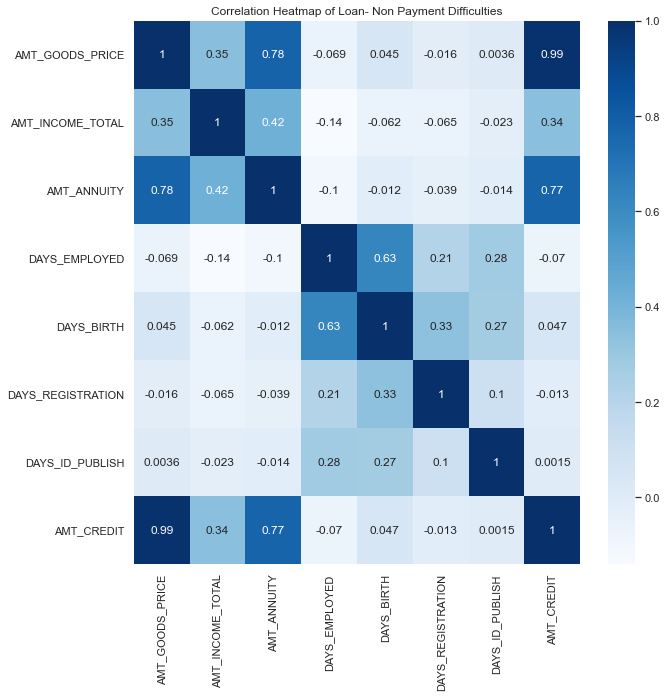

In [340]:
# Heatmap for Loan- Non Payment Difficulties
sns.heatmap(trt0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','AMT_CREDIT',]].corr(method = 'pearson'),cmap = "Blues", annot=True)
plt.title("Correlation Heatmap of Loan- Non Payment Difficulties")

plt.show()

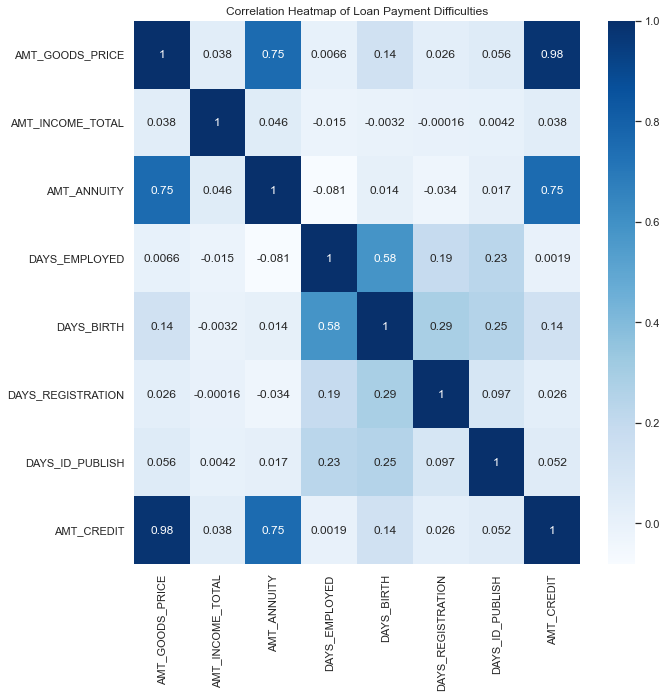

In [341]:
sns.heatmap(trt1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','AMT_CREDIT',]].corr(method = 'pearson'),cmap = "Blues", annot=True)
plt.title("Correlation Heatmap of Loan Payment Difficulties")

plt.show()

#### We observe that there is a high correlation between credit amount and goods price. There appears to be some deviancies in the correlation of Loan-Payment Difficulties and Loan- Non Payment Difficulties such as credit amount v/s income.

# Top 10 Correlation for client with payment difficulties

In [342]:
corr=trt1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

In [343]:
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()

In [344]:
corr_df.sort_values('CORR_ABS', ascending=False).head(10)


VAR1             VAR2  CORRELATION  CORR_ABS
56         AMT_CREDIT  AMT_GOODS_PRICE     0.983103  0.983103
16        AMT_ANNUITY  AMT_GOODS_PRICE     0.752699  0.752699
58         AMT_CREDIT      AMT_ANNUITY     0.752195  0.752195
35         DAYS_BIRTH    DAYS_EMPLOYED     0.582441  0.582441
44  DAYS_REGISTRATION       DAYS_BIRTH     0.289116  0.289116
52    DAYS_ID_PUBLISH       DAYS_BIRTH     0.252256  0.252256
51    DAYS_ID_PUBLISH    DAYS_EMPLOYED     0.229090  0.229090
43  DAYS_REGISTRATION    DAYS_EMPLOYED     0.192455  0.192455
32         DAYS_BIRTH  AMT_GOODS_PRICE     0.135603  0.135603
60         AMT_CREDIT       DAYS_BIRTH     0.135070  0.135070

### The above dataframe shows top 10 correlation for clients with payment difficulties

# 05.Data Analysis on Previous Application data

##  Data loading and Inspection

In [345]:
# loading the previous_application.csv
apd_df_prev= pd.read_csv('previous_application.csv')
# chnaging the negative values in the columns whose name start with DAYS to positive values.
filter_col = [col for col in apd_df_prev if col.startswith('DAYS')]
apd_df_prev[filter_col]= abs(apd_df_prev[filter_col])
apd_df_prev.head()


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0             73  Cash through the bank                XAP              NaN   
1            164                    XNA                XAP    Unaccompanied   
2            301  Cash through the bank                XAP  Spouse, partner   
3            512  Cash through the bank                XAP              NaN   
4            781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [346]:
apd_df_prev.shape

(1670214, 37)

In [347]:
apd_df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Data Cleaning

### Missing Values

In [348]:
# XNA and XAP are replaced by NaN
apd_df_prev=apd_df_prev.replace('XNA', np.NaN)
apd_df_prev=apd_df_prev.replace('XAP', np.NaN)

In [349]:
# Checking columns with  missing values

apd_df_prev.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                 346
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE         1600579
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE               627384
CODE_REJECT_REASON             1358337
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                  1941
NAME_GOODS_CATEGORY             950809
NAME_PORTFOLIO                  372230
NAME_PRODUCT_TYPE              1063666
CHANNEL_TYPE             

In [350]:
# Checking % of missing values

apd_df_prev.isnull().sum()/len(apd_df_prev)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.020716
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE         95.830774
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE              37.563091
CODE_REJECT_REASON             81.327123
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.116213
NAME_GOODS_CATEGORY            56.927376
NAME_PORTFOLIO                 22.286366
NAME_PRODUCT_TYP

## Handling Missing Values 

In [351]:
#As the DF is massive, deleting rows withy Null values for AMT_ANNUITY, AMT_GOODS_PRICE. We need these columns for 
#analysis as seen in application data frame and hence not deleting the columns

apd_df_prev = apd_df_prev.dropna(axis=0, subset=['AMT_ANNUITY'])
apd_df_prev = apd_df_prev.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
apd_df_prev.isnull().sum()/len(apd_df_prev)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               40.546489
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              40.546489
RATE_INTEREST_PRIMARY          99.522595
RATE_INTEREST_PRIVILEGED       99.522595
NAME_CASH_LOAN_PURPOSE         94.433853
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE              19.271937
CODE_REJECT_REASON             80.774520
NAME_TYPE_SUITE                32.647474
NAME_CLIENT_TYPE                0.072293
NAME_GOODS_CATEGORY            45.193851
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [352]:
#Checking columns with >13% NULL values

print(apd_df_prev.columns[(apd_df_prev.isnull().sum() * 100 / apd_df_prev.shape[0]) > 13])

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [353]:
apd_df_prev[(apd_df_prev['NAME_CONTRACT_STATUS']!="Approved")]['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=True)



Series([], Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64)

In [354]:
apd_df_prev[(apd_df_prev['NAME_CONTRACT_STATUS']=="Approved")]['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=True)

0.0    624021
1.0    331064
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [355]:
apd_df_prev[(apd_df_prev['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_FIRST_DRAWING'].value_counts(dropna=True)

Series([], Name: DAYS_FIRST_DRAWING, dtype: int64)

In [356]:
apd_df_prev[(apd_df_prev['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_FIRST_DUE'].value_counts(dropna=True)

Series([], Name: DAYS_FIRST_DUE, dtype: int64)

In [357]:
apd_df_prev[(apd_df_prev['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_LAST_DUE_1ST_VERSION'].value_counts(dropna=True)

Series([], Name: DAYS_LAST_DUE_1ST_VERSION, dtype: int64)

In [358]:
apd_df_prev[(apd_df_prev['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_TERMINATION'].value_counts(dropna=True)

Series([], Name: DAYS_TERMINATION, dtype: int64)

In [359]:
apd_df_prev[apd_df_prev['NAME_CONTRACT_STATUS']!="Approved"].shape

(252382, 37)

In [360]:
apd_df_prev[apd_df_prev['DAYS_LAST_DUE'].isna()].shape

(291235, 37)

#### ALL Columns mentioned above are NAN for Non approved case which is correct representation. Without a loan, applicant cant drawand applicant will not have Insurance too. However, we will drop all these rows as we will not do any analysis with these.

In [361]:
#Dropping all >35 null value columns
dropcol=apd_df_prev.columns[(apd_df_prev.isnull().sum() * 100 / apd_df_prev.shape[0]) > 35]
apd_df_prev.drop(axis=1, columns=dropcol, inplace=True)
apd_df_prev.shape

(1246320, 28)

In [362]:
#Checking columns with NULL values

apd_df_prev.columns[(apd_df_prev.isnull().sum()>0)]

Index(['NAME_PAYMENT_TYPE', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_YIELD_GROUP', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [363]:
apd_df_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.246320e+06     1.246320e+06             1.246320e+06   
mean   2.492727e+05     2.326240e+05             1.258250e+01   
std    3.465843e+05     3.186729e+05             3.326113e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    5.157450e+04     5.220000e+04             1.000000e+01   
50%    1.161675e+05     1.125000e+05             1.200000e+01   
75%    2.700000e+05     2.475000e+05             1.500000e+01   
max    4.509688e+06     5.850000e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  \
count            1.246320e+06   1.246320e+06      1.246320e+06  1.246320e+06   
mean             9.978914e-01   1.021855e+03      4.056201e+02  1.671954e+01   
std              4.587116e-02   7.864511e+02      8.246103e+03  1.448712e+01   
min              0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00   
25%              1.000000e+00   3.850000e+02     -1.000000e+00  6.000000e+00   
50%              1.000000e+00   7.660000e+02      2.700000e+01  1.200000e+01   
75%              1.000000e+00   1.534000e+03      1.460000e+02  2.400000e+01   
max              1.000000e+00   2.922000e+03      4.000000e+06  8.400000e+01   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       955085.000000   955085.000000              955085.000000   
mean        353638.500764    12751.766743               20627.474289   
std          64026.046291    64121.338922               82531.995018   
min              2.000000        2.000000                   0.000000   
25%         365243.000000      463.000000                 244.000000   
50%         365243.000000      894.000000                 684.000000   
75%         365243.000000     1750.000000                1574.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  955085.000000     955085.000000              955085.000000  
mean    72604.830761      73914.112433                   0.346633  
std    144763.580580     145762.804530                   0.475898  
min         2.000000          2.000000                   0.000000  
25%       441.000000        437.000000                   0.000000  
50%      1114.000000       1116.000000                   0.000000  
75%      2338.000000       2344.000000                   1.000000  
max    365243.000000     365243.000000                   1.000000

In [364]:
#deleting some additional numerical var columns as we do not intend to use them for analysis and they dont seem relevant too

dropcol=['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
apd_df_prev.drop(axis=1, columns=dropcol, inplace=True)
apd_df_prev.shape

(1246320, 24)

In [365]:
# Analysing values of object variable
for i in apd_df_prev.columns:
    if apd_df_prev[i].dtypes=="object":
        print(apd_df_prev[i].value_counts(normalize=True, dropna= False))
        print('\n\n')


Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: NAME_CONTRACT_TYPE, dtype: float64



SATURDAY     0.152194
FRIDAY       0.149213
WEDNESDAY    0.148734
TUESDAY      0.148228
MONDAY       0.146892
THURSDAY     0.146119
SUNDAY       0.108620
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64



Y    0.997222
N    0.002778
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64



Approved        0.797498
Refused         0.193344
Canceled        0.008427
Unused offer    0.000730
Name: NAME_CONTRACT_STATUS, dtype: float64



Cash through the bank                        0.799903
NaN                                          0.192719
Non-cash from your account                   0.006519
Cashless from the account of the employer    0.000859
Name: NAME_PAYMENT_TYPE, dtype: float64



Unaccompanied      0.404399
NaN                0.326475
Family             0.168696
Spouse, partner    0.052993
Children           0.024769
Other_B            0.013801
Other_A     

# Univariate Analysis

## Categorical Nominal

Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: NAME_CONTRACT_TYPE, dtype: float64


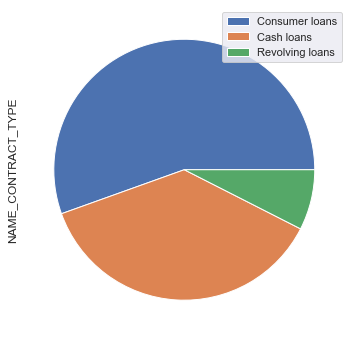



SATURDAY     0.152194
FRIDAY       0.149213
WEDNESDAY    0.148734
TUESDAY      0.148228
MONDAY       0.146892
THURSDAY     0.146119
SUNDAY       0.108620
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


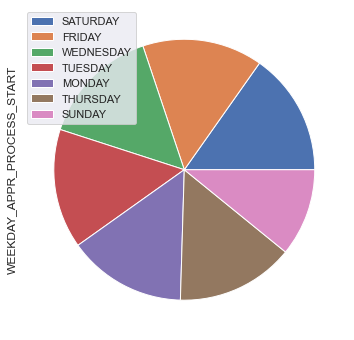



Y    0.997222
N    0.002778
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64


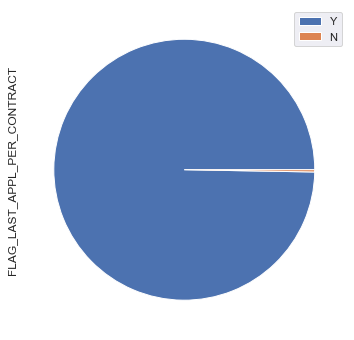



Approved        0.797498
Refused         0.193344
Canceled        0.008427
Unused offer    0.000730
Name: NAME_CONTRACT_STATUS, dtype: float64


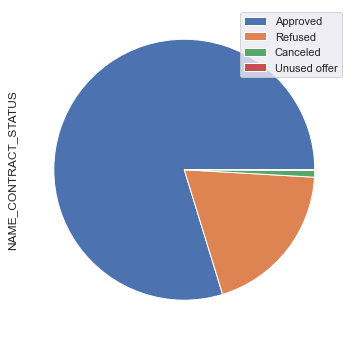



Cash through the bank                        0.799903
NaN                                          0.192719
Non-cash from your account                   0.006519
Cashless from the account of the employer    0.000859
Name: NAME_PAYMENT_TYPE, dtype: float64


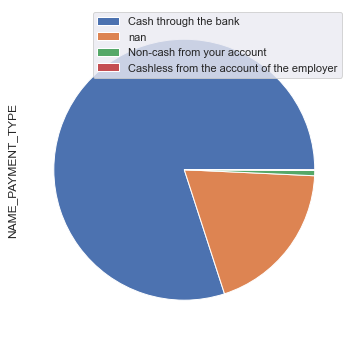



Unaccompanied      0.404399
NaN                0.326475
Family             0.168696
Spouse, partner    0.052993
Children           0.024769
Other_B            0.013801
Other_A            0.007118
Group of people    0.001749
Name: NAME_TYPE_SUITE, dtype: float64


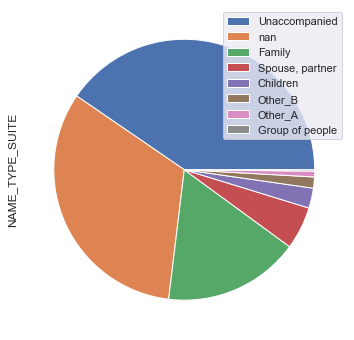



Repeater     0.677066
New          0.236334
Refreshed    0.085877
NaN          0.000723
Name: NAME_CLIENT_TYPE, dtype: float64


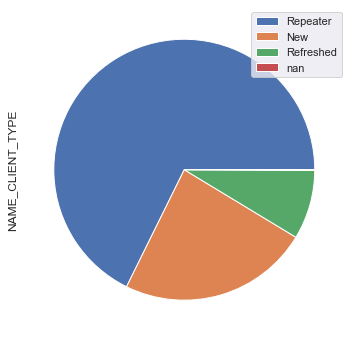



POS      0.554438
Cash     0.370341
Cards    0.074880
Cars     0.000341
Name: NAME_PORTFOLIO, dtype: float64


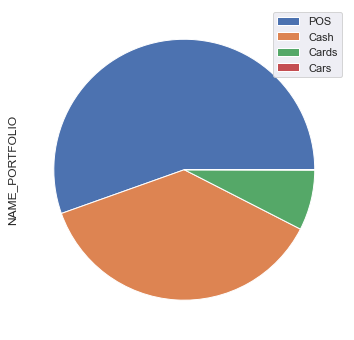



Country-wide                  0.359302
Credit and cash offices       0.317926
Stone                         0.166645
Regional / Local              0.085031
AP+ (Cash loan)               0.038082
Contact center                0.027836
Channel of corporate sales    0.004817
Car dealer                    0.000363
Name: CHANNEL_TYPE, dtype: float64


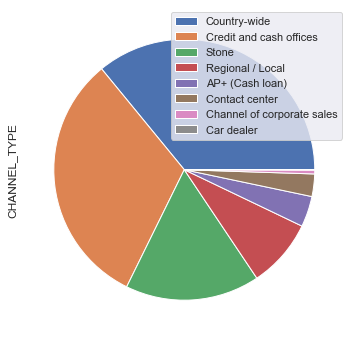



middle        0.309335
high          0.283497
low_normal    0.258437
NaN           0.074880
low_action    0.073850
Name: NAME_YIELD_GROUP, dtype: float64


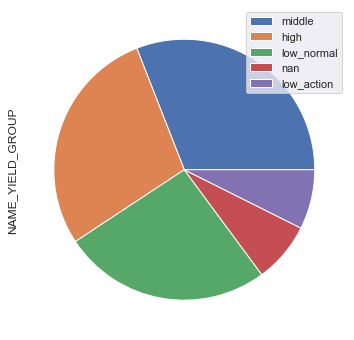



POS household with interest       0.206895
POS mobile with interest          0.152865
Cash X-Sell: middle               0.115446
Cash X-Sell: low                  0.104506
POS industry with interest        0.078757
POS household without interest    0.066522
Cash Street: high                 0.047852
Cash X-Sell: high                 0.047581
Card Street                       0.041335
Card X-Sell                       0.033545
Cash Street: middle               0.027808
Cash Street: low                  0.027147
POS mobile without interest       0.019322
POS other with interest           0.018255
POS industry without interest     0.010111
POS others without interest       0.002050
Name: PRODUCT_COMBINATION, dtype: float64


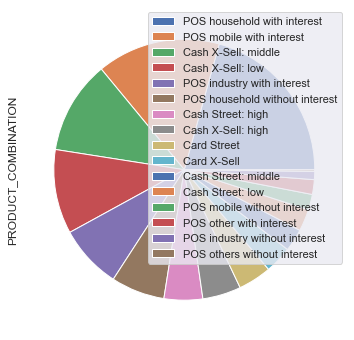

In [366]:
#Checking all object types Variables and their values
for i in apd_df_prev.columns:
    if apd_df_prev[i].dtypes=="object":
        print(apd_df_prev[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        apd_df_prev[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()
        print("\n")
        

### Few notable points

###### 1. This dataframe has a differnt type of loan called Consumer Loan, which was not there in Application data frame. 55% of loans are consumer loans. 37% cash loans and rest revolving.
2. Approved loans are 79% and refused, cancelled, unused - rest. **IMBALANCE IN DATA**
3. 67% are repeaters. NAME_CLIENT_TYPE also has some null values showing as XNA
4. 55% of the applicants have taken loan for POS purchase.
5. Name seller industry has 37% XNA values, Consumer electronics is next highest category at 30%

# Numerical Variable

In [367]:
apd_df_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE   CNT_PAYMENT  DAYS_FIRST_DRAWING  \
count  1.246320e+06     1.246320e+06  1.246320e+06       955085.000000   
mean   2.492727e+05     2.326240e+05  1.671954e+01       353638.500764   
std    3.465843e+05     3.186729e+05  1.448712e+01        64026.046291   
min    0.000000e+00     0.000000e+00  0.000000e+00            2.000000   
25%    5.157450e+04     5.220000e+04  6.000000e+00       365243.000000   
50%    1.161675e+05     1.125000e+05  1.200000e+01       365243.000000   
75%    2.700000e+05     2.475000e+05  2.400000e+01       365243.000000   
max    4.509688e+06     5.850000e+06  8.400000e+01       365243.000000   

       DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
count   955085.000000              955085.000000  955085.000000   
mean     12751.766743               20627.474289   72604.830761   
std      64121.338922               82531.995018  144763.580580   
min          2.000000                   0.000000       2.000000   
25%        463.000000                 244.000000     441.000000   
50%        894.000000                 684.000000    1114.000000   
75%       1750.000000                1574.000000    2338.000000   
max     365243.000000              365243.000000  365243.000000   

       DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count     955085.000000              955085.000000  
mean       73914.112433                   0.346633  
std       145762.804530                   0.475898  
min            2.000000                   0.000000  
25%          437.000000                   0.000000  
50%         1116.000000                   0.000000  
75%         2344.000000                   1.000000  
max       365243.000000                   1.000000

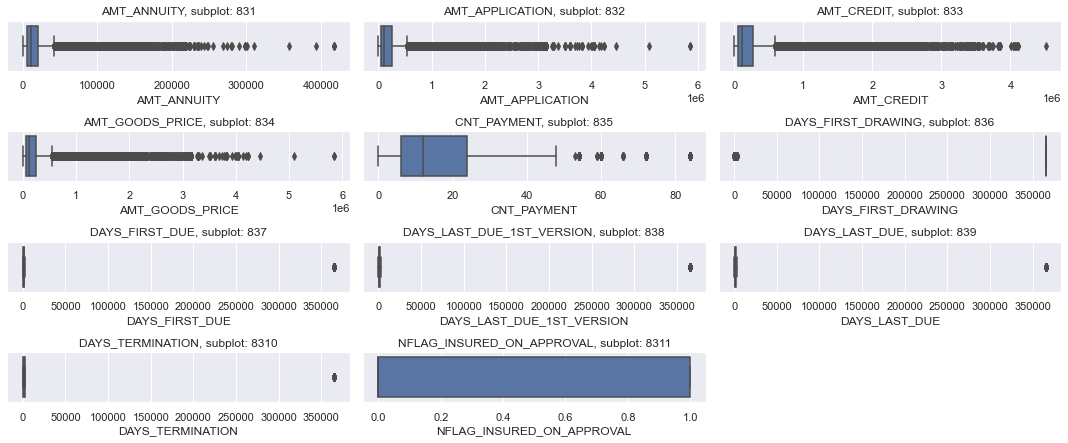

In [368]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in apd_df_prev.columns:
    if apd_df_prev[i].dtypes=="float64" or apd_df_prev[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(apd_df_prev[i])
        c = c + 1

fig.tight_layout()
plt.show()

### Continuous Variables seem to have high percentage of outliers. Checking distribution 

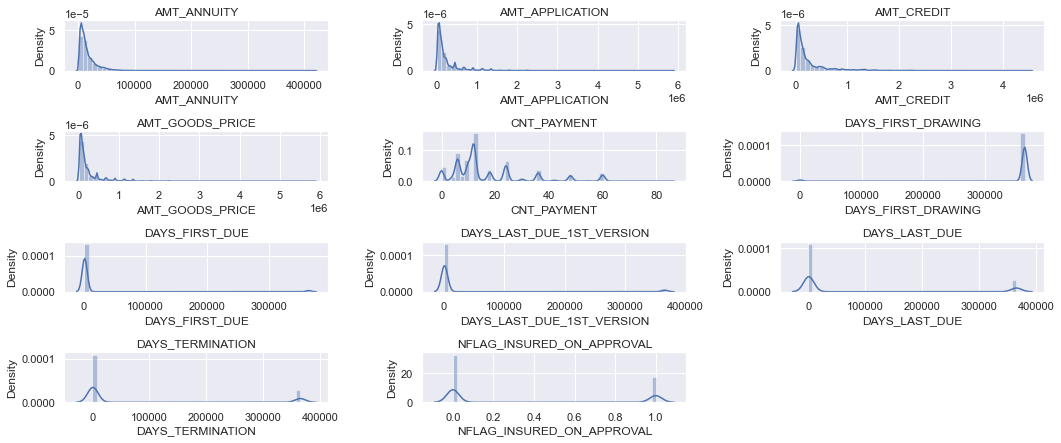

In [369]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in apd_df_prev.columns:
    if apd_df_prev[i].dtypes=="float64" or apd_df_prev[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title(i)
        plt.xlabel(i)
        sns.distplot(a=apd_df_prev[i])
        c = c + 1

fig.tight_layout()
plt.show()

##  Points to be noted


#### Continuous Variables seem to have high percentage of outliers. Box plot and distribution both signify the same.

# Bivariate Analysis

### Categorical and Categorical Variable

In [370]:
#checking the dataframe 
apd_df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

  FLAG_LAST_APPL_PER_CONTRACT NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                           Y             Approved  Cash through the bank   
1                           Y             Approved                    NaN   
2                           Y             Approved  Cash through the bank   
3                           Y             Approved  Cash through the bank   
4                           Y              Refused  Cash through the bank   

   NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  \
0              NaN         Repeater            POS             Country-wide   
1    Unaccompanied         Repeater           Cash           Contact center   
2  Spouse, partner         Repeater           Cash  Credit and cash offices   
3              NaN         Repeater           Cash  Credit and cash offices   
4              NaN         Repeater           Cash  Credit and cash offices   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0            42.0                      300.0           42.0              37.0   
1           134.0                      916.0       365243.0          365243.0   
2           271.0                       59.0       365243.0          365243.0   
3           482.0                      152.0          182.0             177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        NaN

In [371]:
cols=['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']

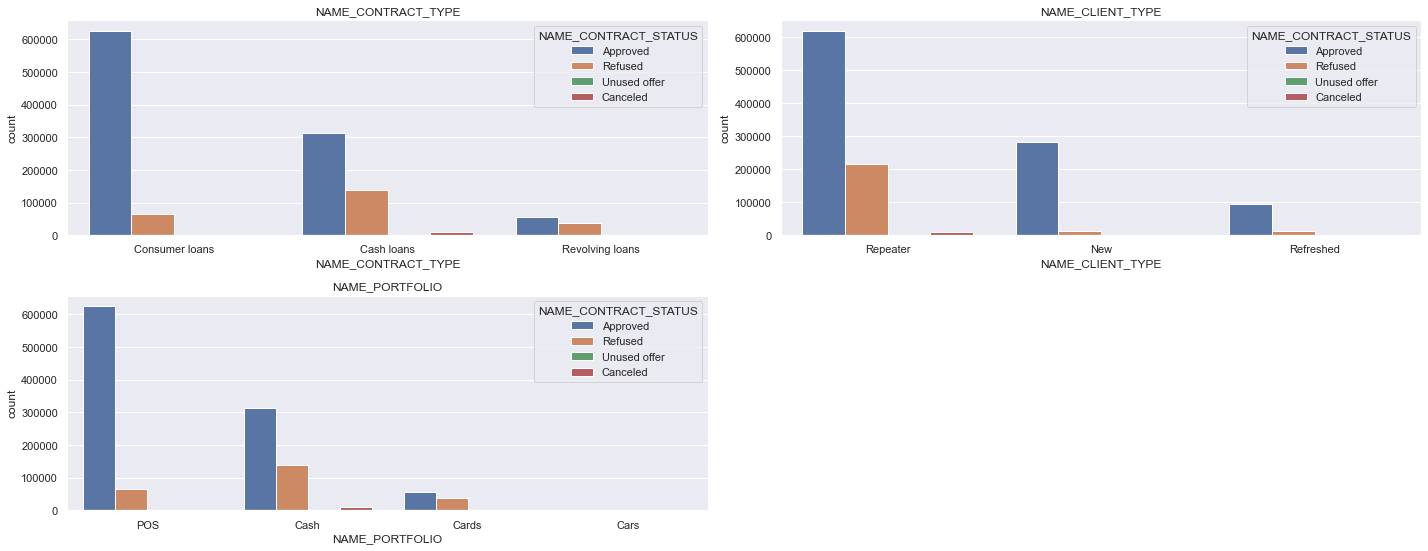

In [372]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in cols:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=apd_df_prev, hue='NAME_CONTRACT_STATUS')
    c = c + 1

fig.tight_layout()
plt.show()

# Notable points

#### 1. In approved category, consumer loan has largest no of applicants. 
2. There seem to be no cancelled loans in cash loan category than consumer loan.
3. More cash loans have been refused than consumer loans.
4. The bank has more repeaters in all approved, refused, unused, cancelled categories
5. POS transactions seem to be consumer loans and similar to point 2 - more cash laons have been refused than POS.

# Top Correlations

In [373]:
df_core_prev=apd_df_prev.drop(axis=1,columns=['SK_ID_CURR','SK_ID_PREV'] )

correlation=df_core_prev.corr().abs()

In [374]:
core_prev = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool)).unstack().reset_index()
core_prev.columns=['Column1','Column2','Correlation']
core_prev.dropna(subset=['Correlation'],inplace=True)
core_prev = core_prev.sort_values(by=['Correlation'], ascending=False)

core_prev

Column1                    Column2  Correlation
34             AMT_GOODS_PRICE            AMT_APPLICATION     0.999883
35             AMT_GOODS_PRICE                 AMT_CREDIT     0.993028
23                  AMT_CREDIT            AMT_APPLICATION     0.992965
107           DAYS_TERMINATION              DAYS_LAST_DUE     0.967745
33             AMT_GOODS_PRICE                AMT_ANNUITY     0.820895
11             AMT_APPLICATION                AMT_ANNUITY     0.820831
22                  AMT_CREDIT                AMT_ANNUITY     0.814884
82   DAYS_LAST_DUE_1ST_VERSION         DAYS_FIRST_DRAWING     0.756672
46                 CNT_PAYMENT                 AMT_CREDIT     0.700323
45                 CNT_PAYMENT            AMT_APPLICATION     0.672276
47                 CNT_PAYMENT            AMT_GOODS_PRICE     0.672129
83   DAYS_LAST_DUE_1ST_VERSION             DAYS_FIRST_DUE     0.567085
95               DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION     0.418949
106           DAYS_TERMINATION  DAYS_LAST_DUE_1ST_VERSION     0.412050
44                 CNT_PAYMENT                AMT_ANNUITY     0.401020
94               DAYS_LAST_DUE             DAYS_FIRST_DUE     0.362737
104           DAYS_TERMINATION         DAYS_FIRST_DRAWING     0.321398
105           DAYS_TERMINATION             DAYS_FIRST_DUE     0.311945
81   DAYS_LAST_DUE_1ST_VERSION                CNT_PAYMENT     0.303493
114  NFLAG_INSURED_ON_APPROVAL                CNT_PAYMENT     0.297635
110  NFLAG_INSURED_ON_APPROVAL                AMT_ANNUITY     0.288615
93               DAYS_LAST_DUE         DAYS_FIRST_DRAWING     0.285296
112  NFLAG_INSURED_ON_APPROVAL                 AMT_CREDIT     0.280342
113  NFLAG_INSURED_ON_APPROVAL            AMT_GOODS_PRICE     0.243399
111  NFLAG_INSURED_ON_APPROVAL            AMT_APPLICATION     0.243399
59          DAYS_FIRST_DRAWING                CNT_PAYMENT     0.228861
90               DAYS_LAST_DUE                 AMT_CREDIT     0.213788
101           DAYS_TERMINATION                 AMT_CREDIT     0.211666
89               DAYS_LAST_DUE            AMT_APPLICATION     0.209450
91               DAYS_LAST_DUE            AMT_GOODS_PRICE     0.209450
102           DAYS_TERMINATION            AMT_GOODS_PRICE     0.207092
100           DAYS_TERMINATION            AMT_APPLICATION     0.207092
70              DAYS_FIRST_DUE                CNT_PAYMENT     0.185190
117  NFLAG_INSURED_ON_APPROVAL  DAYS_LAST_DUE_1ST_VERSION     0.173044
92               DAYS_LAST_DUE                CNT_PAYMENT     0.142869
103           DAYS_TERMINATION                CNT_PAYMENT     0.142138
115  NFLAG_INSURED_ON_APPROVAL         DAYS_FIRST_DRAWING     0.131578
116  NFLAG_INSURED_ON_APPROVAL             DAYS_FIRST_DUE     0.101184
77   DAYS_LAST_DUE_1ST_VERSION                AMT_ANNUITY     0.085967
66              DAYS_FIRST_DUE                AMT_ANNUITY     0.078832
99            DAYS_TERMINATION                AMT_ANNUITY     0.076365
88               DAYS_LAST_DUE                AMT_ANNUITY     0.076256
55          DAYS_FIRST_DRAWING                AMT_ANNUITY     0.049090
119  NFLAG_INSURED_ON_APPROVAL           DAYS_TERMINATION     0.043161
118  NFLAG_INSURED_ON_APPROVAL              DAYS_LAST_DUE     0.042094
68              DAYS_FIRST_DUE                 AMT_CREDIT     0.032453
71              DAYS_FIRST_DUE         DAYS_FIRST_DRAWING     0.029752
69              DAYS_FIRST_DUE            AMT_GOODS_PRICE     0.027263
67              DAYS_FIRST_DUE            AMT_APPLICATION     0.027263
58          DAYS_FIRST_DRAWING            AMT_GOODS_PRICE     0.024452
56          DAYS_FIRST_DRAWING            AMT_APPLICATION     0.024452
57          DAYS_FIRST_DRAWING                 AMT_CREDIT     0.016382
80   DAYS_LAST_DUE_1ST_VERSION            AMT_GOODS_PRICE     0.010172
78   DAYS_LAST_DUE_1ST_VERSION            AMT_APPLICATION     0.010172
79   DAYS_LAST_DUE_1ST_VERSION                 AMT_CREDIT     0.000300

<Figure size 1440x576 with 0 Axes>

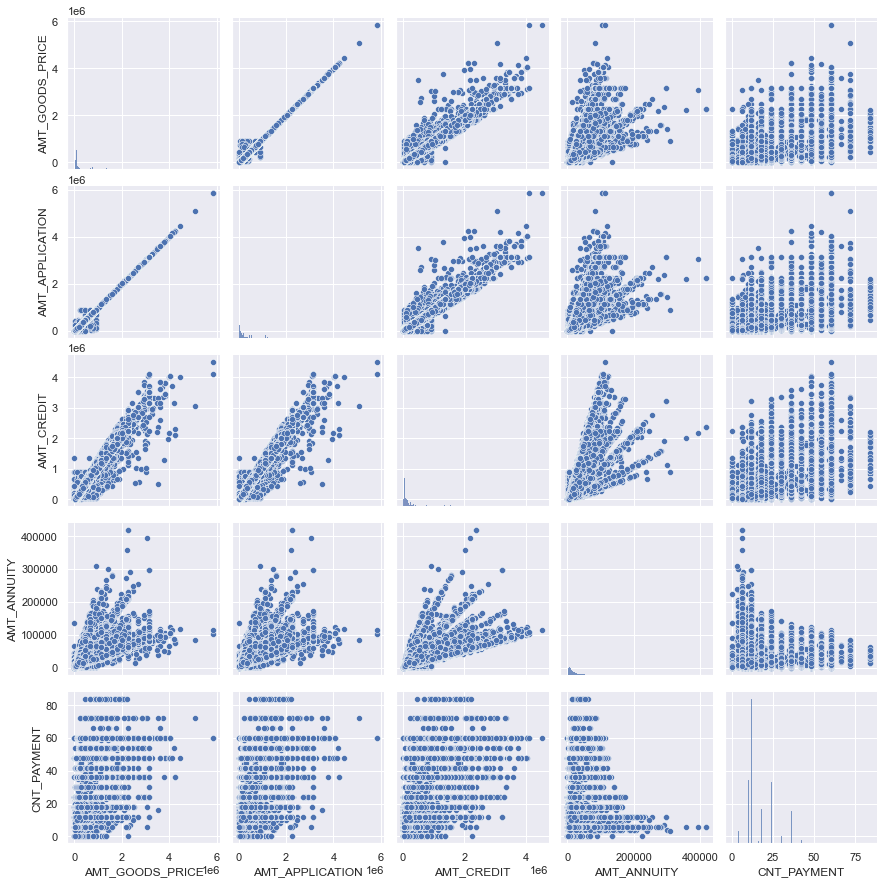

In [375]:
plt.figure(figsize=[20,8])
sns.pairplot(apd_df_prev[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])
plt.show()    
    

# Points to be noted

#### 1. AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION - as expected have high correlation. Higher the value of good purchased more there will be need of loan and surely all these will correlate
2. Similary, AMT_Credit to AMT_GOOD_PRICE also the correlation is high, Column CNT_Payment ideally should have had a high correlation with AMT_credit, ie higher credit, more the term of 
loan. But no such correaltion can be seen.

# Multivariate Analysis

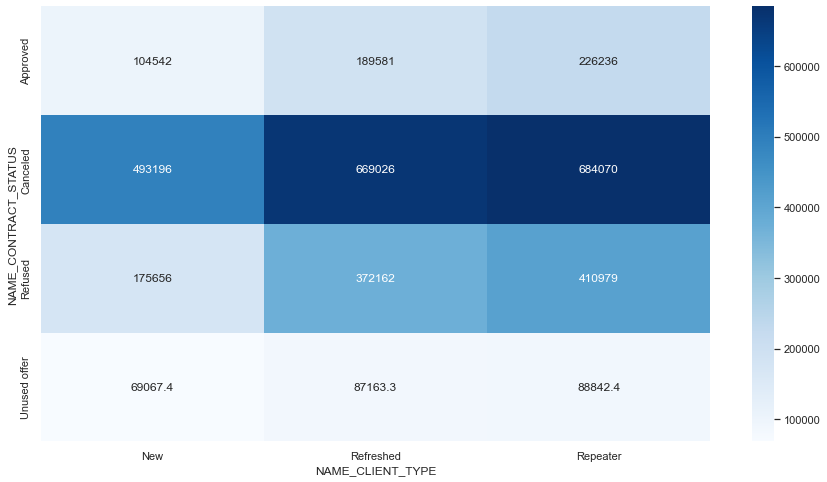

In [376]:
# Checking contract status vs name client type aggregating over application amount

res=pd.pivot_table(data=apd_df_prev, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

# Points to be noted
1. Unused offer application amount is low
2. Cancelled application amount is high. The bank may be refusing these possibly as the Debt liabiltiy ratio of consumer must be going high due to the high amount and thus credit defualt risk.
3. Repreater's application amount is higeht than the New customers. This may indicate that the bank has more conducive         policies/rate of interest etc for repeat applicants

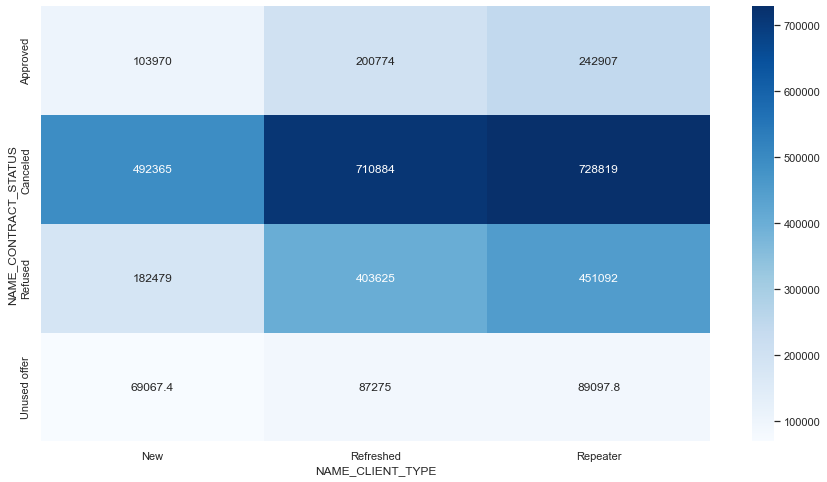

In [377]:
# Checking contract status vs name client type aggregating over AMT CREDIT

res=pd.pivot_table(data=apd_df_prev, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_CREDIT')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

## Points to be noted
1.Unused offer CREDIT AMOUNT is low. This may be the reason for customer not using


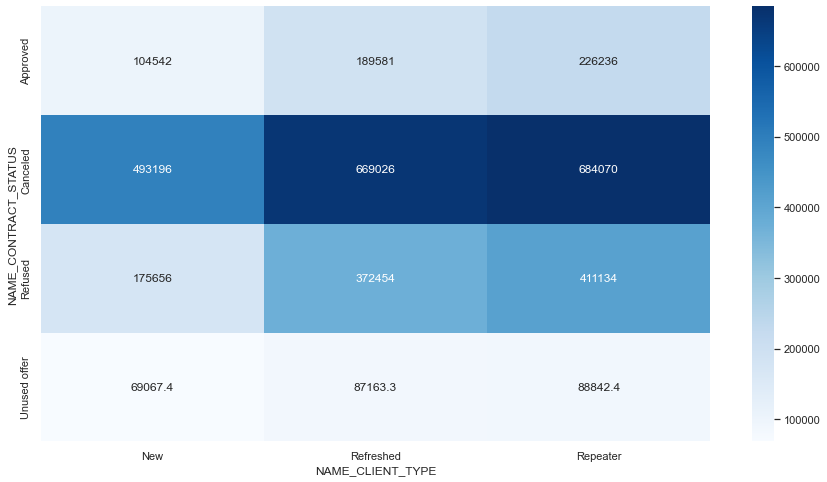

In [378]:
# Checking contract status vs name client type aggregating over AMOUNT GOOD PRICE

resu=pd.pivot_table(data=apd_df_prev, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(resu, annot=True,cmap='Blues', fmt="g")
plt.show()


#### All cancelled and refused cases have higher value of goods than other categories

# Merged Data frames Analysis

In [379]:
#checking if any duplicate values in SK_ID_PREV
duplicate = apd_df_prev[apd_df_prev.duplicated(subset='SK_ID_CURR')]
duplicate.shape

(908809, 24)

#### SK_ID_CURR has duplicates in prev_df. Indicating that app_df and prev_df will have a one to many relationship



# Merging two data frames, Data Loading and Inspection

In [380]:
dp=pd.merge( apd_df,apd_df_prev, how='left', on="SK_ID_CURR")
dp.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            637             3648.0   
1                    0.003541          45           1188             1186.0   
2                    0.003541          45           1188             1186.0   
3                    0.003541          45           1188             1186.0   
4                    0.010032          52            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START  \
0                    WEDNESDAY                       10   
1                       MONDAY                       11   
2                       MONDAY                       11   
3                       MONDAY                       11   
4                       MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [381]:
dp.shape

(1078854, 99)

# Analysis

In [382]:
# Plotting Name contract status to check % of default, ie Target 0 and 1

contract=dp['NAME_CONTRACT_STATUS'].unique()
contract

array(['Approved', 'Refused', nan, 'Canceled', 'Unused offer'],
      dtype=object)

Trt 0 and 1 for :  Approved
0    0.924108
1    0.075892
Name: TARGET, dtype: float64


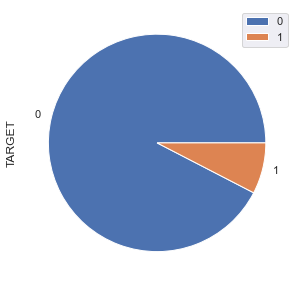

Trt 0 and 1 for :  Refused
0    0.884182
1    0.115818
Name: TARGET, dtype: float64


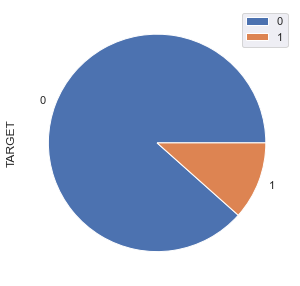

No handles with labels found to put in legend.


Trt 0 and 1 for :  nan
Series([], Name: TARGET, dtype: float64)


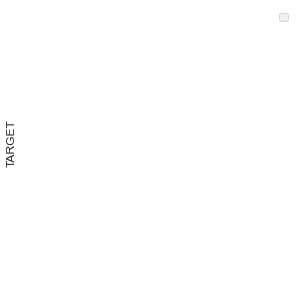

Trt 0 and 1 for :  Canceled
0    0.917609
1    0.082391
Name: TARGET, dtype: float64


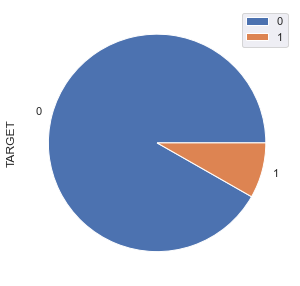

Trt 0 and 1 for :  Unused offer
0    0.895141
1    0.104859
Name: TARGET, dtype: float64


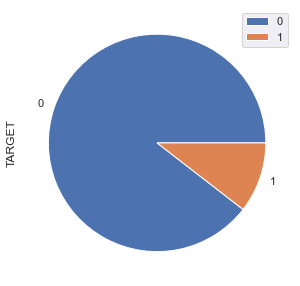

In [383]:
for i in contract:
    print("Trt 0 and 1 for : ",i)
    plt.figure(figsize=[8,5])
    print(dp[(dp['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts(normalize=True))
    dp[(dp['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts().plot.pie(normalize=True)
    plt.legend()
    plt.show()

# Points to be noted
1. 7.5% of Approved loans have defaults
2. Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern. This indicates that the financial company had Refused/cancelled previous application, but has approved the current and is facing default on these loans.

In [384]:
# Number of Defaults in approved cases
approvedDefault=dp[(dp['NAME_CONTRACT_STATUS']=="Approved") & (dp['TARGET']==1)]
approvedDefault.shape

(64400, 99)

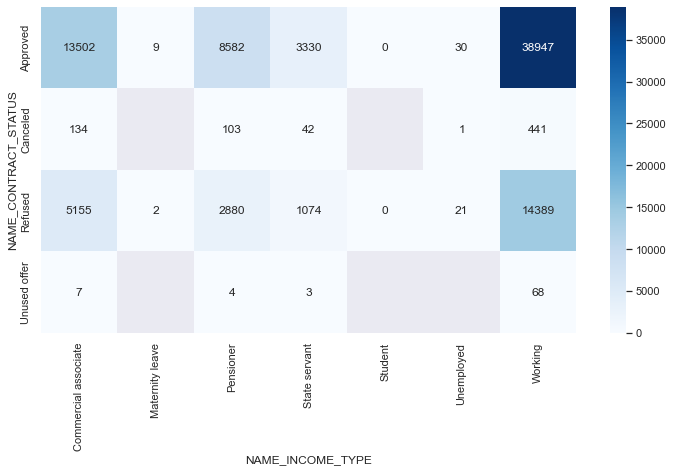

In [385]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target

resu=pd.pivot_table(data=dp,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(resu, annot=True,cmap='Blues', fmt="g")
plt.show()

# Points to be noted
1. Since Target 1 is default, higher on the above matrix shows correlation to default.
2. Working applicant with Approved status have defaulted in highest numbers
3. Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern. This indicates that the financial company had Refused/cancelled previous application, but has approved the current and is facing default on these loans.
4, 14,389 applicanst of working class were REFUSED earlier and now have defaulted.

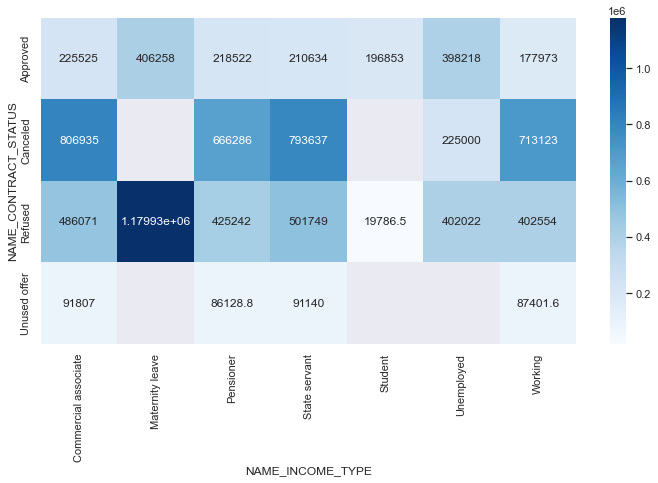

In [386]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target

resu=pd.pivot_table(data=dp,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(12,6))
sns.heatmap(resu, annot=True,cmap='Blues', fmt="g")
plt.show()

## Points to be noted
1.Higher credot offered to unemployed, maternity leave is a notable factor
2. Unused offers have smaller credit values and possibly the reason why applicant is not usign them

In [387]:
cols=['CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE',"ORGANIZATION_TYPE" ]

for i in cols:
    print(approvedDefault[i].value_counts(normalize=True))
    print('\n')

F    0.59222
M    0.40778
Name: CODE_GENDER, dtype: float64


Working                 0.604767
Commercial associate    0.209658
Pensioner               0.133261
State servant           0.051708
Unemployed              0.000466
Maternity leave         0.000140
Name: NAME_INCOME_TYPE, dtype: float64


Laborers                 0.314332
Sales staff              0.168312
Drivers                  0.111941
Core staff               0.090577
Managers                 0.070796
Security staff           0.038783
High skill tech staff    0.038361
Cooking staff            0.034270
Medicine staff           0.032667
Accountants              0.026530
Cleaning staff           0.024442
Low-skill Laborers       0.019739
Private service staff    0.009659
Waiters/barmen staff     0.007697
Secretaries              0.005230
Realty agents            0.003501
HR staff                 0.001729
IT staff                 0.001434
Name: OCCUPATION_TYPE, dtype: float64


Business Entity Type 3    0.284040
Self-employe

#  05.Case Summary
Application Data
The count of ‘Maternity Leave’ in ‘NAME_INCOME_TYPE’ is very less and it also has maximum % of payment difficulties- around 40%. Hence, client with income type as ‘Maternity leave’ are the driving factors for Loan Defaulters.

The count of ‘Low skilled Laborers’ in ‘OCCUPATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 17%. Hence, client with occupation type as ‘Low skilled Laborers’ are the driving factors for Loan Defaulters.

The count of ‘Lower Secondary’ in ‘NAME_EDUCATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 11%. Hence, client with education type as ‘Lower Secondary’ are the driving factors for Loan Defaulters.

5.2 Previous Application Data

The count of ‘Refused’ in ‘NAME_CONTRACT_STATUS’ is comparatively less and it also has maximum % of payment difficulties- around 12%. Hence, client with contract status as ‘Refused’ in previous application are the driving factors for Loan Defaulters.

The count of ‘Revolving Loans’ in ‘NAME_CONTRACT_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 10%. Hence, client with contract type as ‘Revolving loans’ in previous application are the driving factors for Loan Defaulters.

It can be observed from the graph that Clients with 'Revolving loans' and with 'Refused' previous application tend to have more % of payment difficulties in current application. Since the count of both 'Revolving loans' and ‘Refused’ is comparatively less(from the graphs in previous slide), clients with ‘Revolving Loans’ and ‘Refused’ previous application are driving factors for Loan Defaulters